# Analysis of Fairness Constrained training of CheXpert
- Picking appropriate training technique for fair and unfair models

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import math
import re
import os
import seaborn as sns
plt.rcParams['figure.dpi'] = 250

from typing import List, Tuple, Optional, Literal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
SAMPLING_TECHNIQUES_NAMES = {
    0: 'NO',
    1: 'RANDOM WEIGHTED',
    2: 'SUBGROUP',
}

FAIRNESS_CONSTRAINTS_NAMES = {
    1: 'EQUAL LOSS',
    2: 'EQUALIZED ODDS',
}


def get_subgroup_names(
    metric,
):
    if 'gap' in metric:
        return {
            f'age_{metric}': f'Age',
            f'sex_{metric}': f'Sex',
            f'race_{metric}': f'Race',
        }
    else:
        return {
            f'age_{metric}_group_0': f'Age < 60',
            f'age_{metric}_group_1': f'Age 60+',
            f'sex_{metric}_group_0': f'Male',
            f'sex_{metric}_group_1': f'Female',
            f'race_{metric}_group_0': f'White',
            f'race_{metric}_group_1': f'Non-White',
        }
    

## Data Skewing Fairness
for potentially finding unfair students
- kept the test set set the same (original/fair) but not the train and val

### Read Data

#### Original CheXpert (but only random weighted sampling)

In [23]:
results_path = '../../results/chexpert/resnet/'

test_data = []

for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            test_data.append(df_tmp)

    
original_df = pd.concat(test_data) 
original_df = original_df[original_df['sampling_technique'] == 1]
original_df.shape

(20, 81)

#### No Male

In [24]:
results_path = '../../results/chexpert_no_male/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_male_df = pd.concat(train_fair_loss_data)   
no_male_df.sort_values(by=['model_name'], inplace=True)
no_male_df.shape

(20, 82)

#### No Female

In [25]:
results_path = '../../results/chexpert_no_female/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_female_df = pd.concat(train_fair_loss_data)   
no_female_df.sort_values(by=['model_name'], inplace=True)
no_female_df.shape

(20, 82)

#### No Old

In [26]:
results_path = '../../results/chexpert_no_old/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_old_df = pd.concat(train_fair_loss_data)   
no_old_df.sort_values(by=['model_name'], inplace=True)
no_old_df.shape

(20, 82)

#### No Young

In [27]:
results_path = '../../results/chexpert_no_young/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_young_df = pd.concat(train_fair_loss_data)   
no_young_df.sort_values(by=['model_name'], inplace=True)
no_young_df.shape

(20, 82)

#### No White

In [28]:
results_path = '../../results/chexpert_no_white/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_white_df = pd.concat(train_fair_loss_data)   
no_white_df.sort_values(by=['model_name'], inplace=True)
no_white_df.shape

(20, 82)

#### No Non-White

In [29]:
results_path = '../../results/chexpert_no_non_white/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
no_non_white_df = pd.concat(train_fair_loss_data)   
no_non_white_df.sort_values(by=['model_name'], inplace=True)
no_non_white_df.shape

(20, 82)

#### Equal Distribution

In [32]:
results_path = '../../results/chexpert_equal/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
equal_df = pd.concat(train_fair_loss_data)   
equal_df.sort_values(by=['model_name'], inplace=True)
equal_df.shape

(20, 82)

#### Reverse Upsampling

In [33]:
results_path = '../../results/chexpert_upsample/resnet/'
train_fair_loss_data = []
for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            train_fair_loss_data.append(df_tmp)
    
upsample_df = pd.concat(train_fair_loss_data)   
upsample_df.sort_values(by=['model_name'], inplace=True)
upsample_df.shape

(20, 82)

#### Lagrange

In [35]:
results_path = '../../results/chexpert/fair_loss/'

test_data = []

for folder in os.scandir(results_path):
    if folder.is_dir():
        # Perform operations on the folder
        file_path = results_path + folder.name
        if os.path.exists(file_path + '/test.csv'):
            df_tmp = pd.read_csv(file_path + '/test.csv')
            test_data.append(df_tmp)

    
fair_loss_df = pd.concat(test_data) 
fair_loss_df.shape

(19, 85)

### Analysis

In [53]:
df_tuples = [
    (original_df, 'Original'),
    (no_male_df, 'No Male'), 
    (no_female_df, 'No Female'), 
    (no_old_df, 'No Old'), 
    (no_young_df, 'No Young'), 
    (no_white_df, 'No White'),
    (no_non_white_df, 'No\nNon-White'),
    (equal_df, 'Equal\nData'), 
    (upsample_df, 'Subgroup\nReversed'),
    (fair_loss_df, 'Lagrange'),
]

for df, df_name in df_tuples:
    df['auc_gap_relative'] = (df['auc_gap'] / df['auc']) * 100
    df['age_auc_gap'] = abs(df['age_auc_group_0'] - df['age_auc_group_1'])
    df['sex_auc_gap'] = abs(df['sex_auc_group_0'] - df['sex_auc_group_1'])
    df['race_auc_gap'] = abs(df['race_auc_group_0'] - df['race_auc_group_1'])
    df['avg_auc_gap'] = (df['age_auc_gap'] + df['sex_auc_gap'] + df['race_auc_gap']) / 3
    df['avg_auc_gap_relative'] = df['avg_auc_gap'] / df['auc']

#### Individual Model Performance (AUC-AUC_gap)

In [15]:
def plot_individual_model_performance(
    df: pd.DataFrame,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    plt.rcParams['figure.dpi'] = 150

    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="model_name", palette="deep")
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        # ncol=2,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=12)

    ax.grid(linestyle='dotted')

    plt.show()

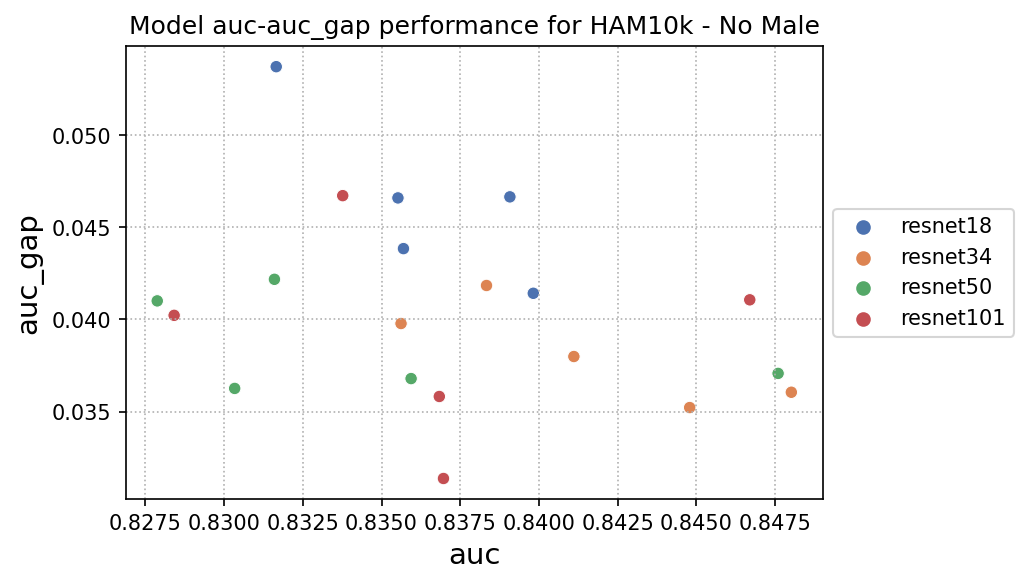

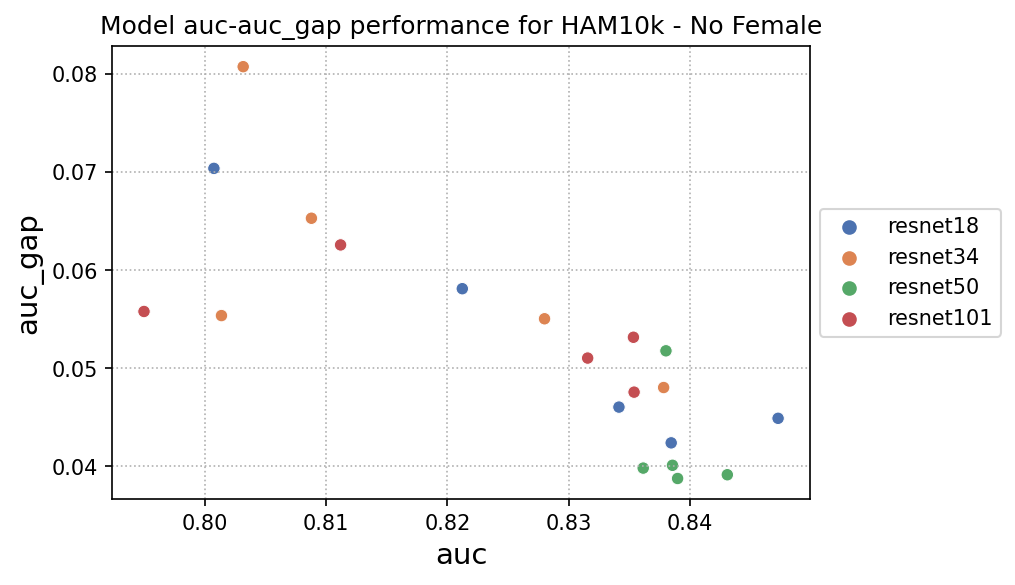

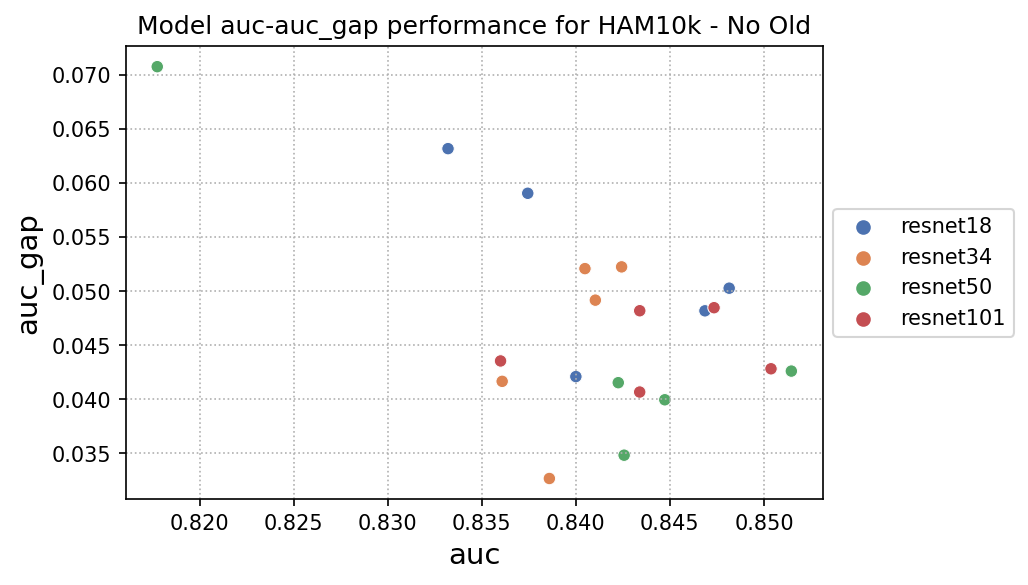

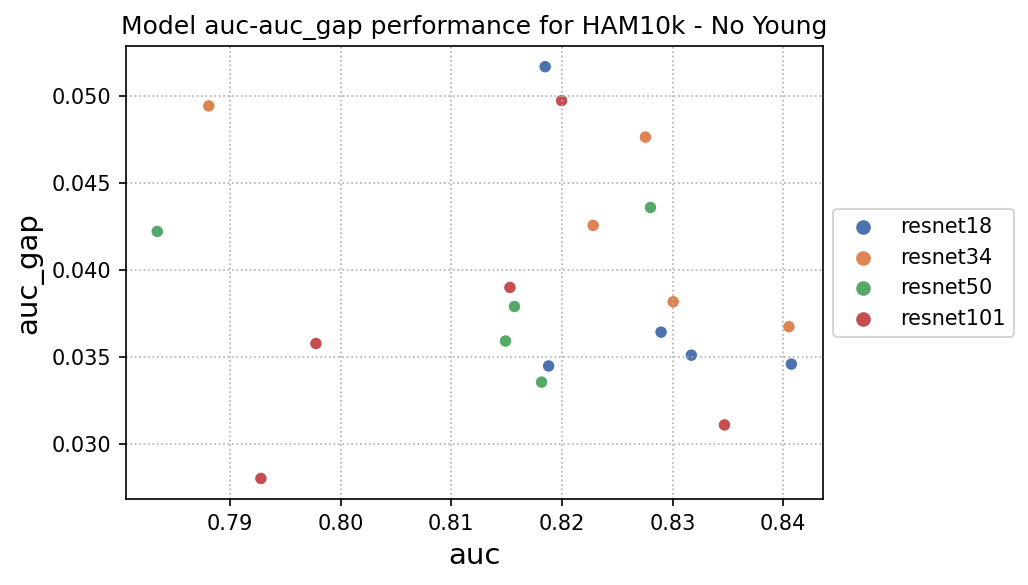

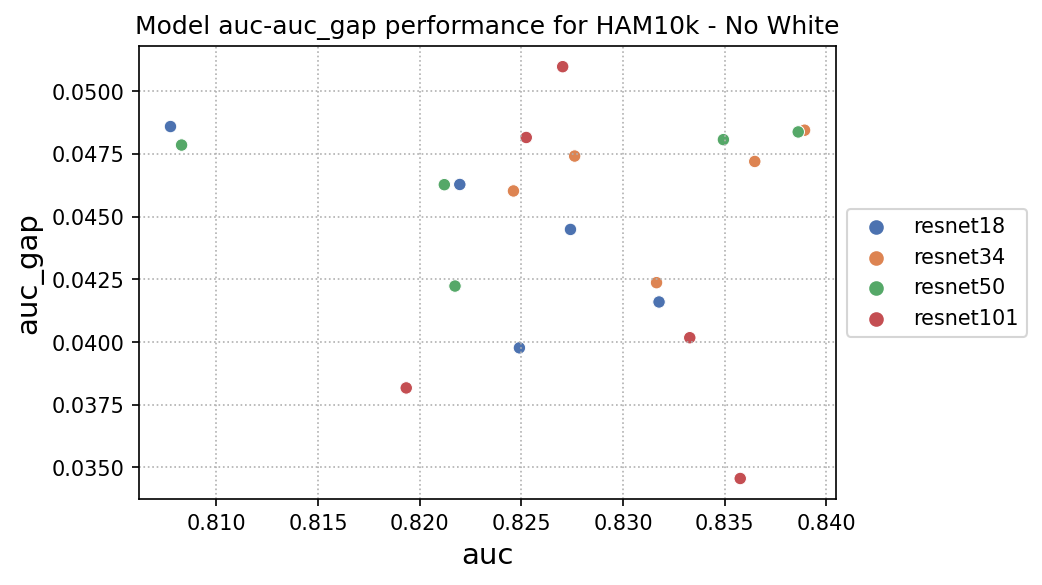

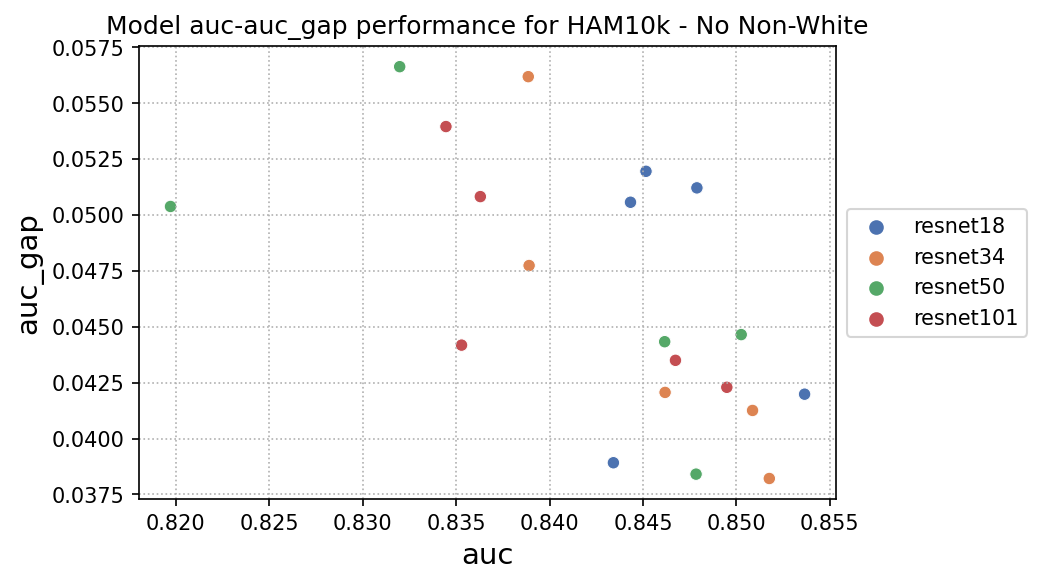

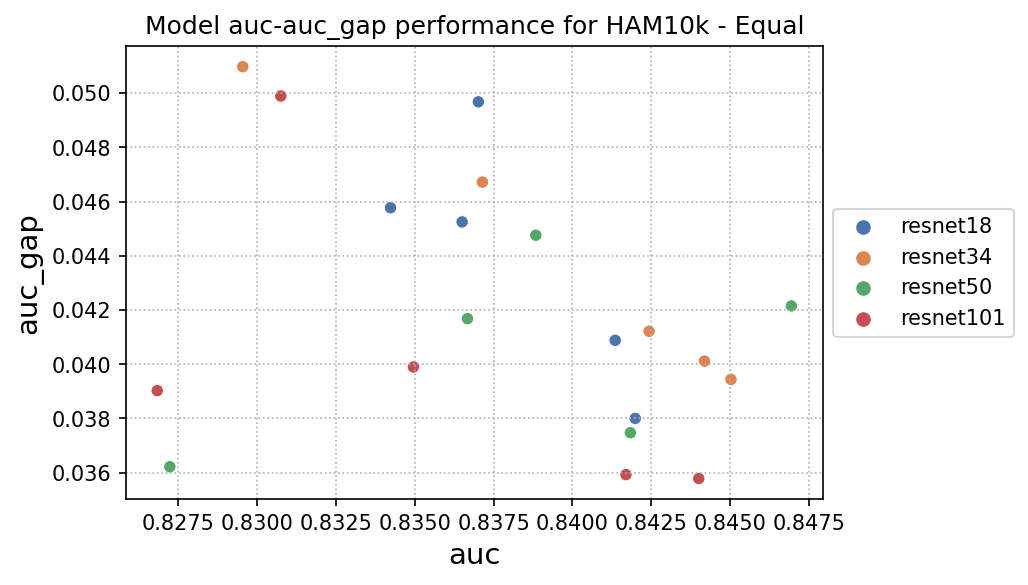

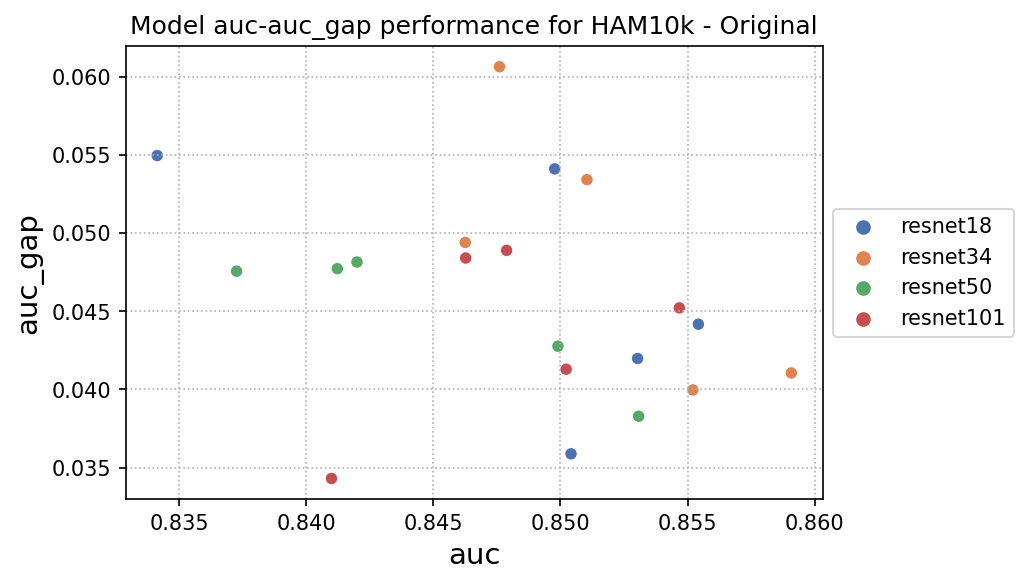

In [18]:
for df, df_name in df_tuples:
    plot_individual_model_performance(df, 'auc', 'auc_gap', 'Model auc-auc_gap performance for HAM10k - ' + df_name)

#### Individual Model Performance in comparison with normal HAM10k data models (AUC-AUC_Gap)

In [22]:
def two_data_model_performance(
    df_tuple,
    original_df,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    # print(df_tuple)
    df, df_name = df_tuple
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df = df[['model_name', metric_1, metric_2]]
    df['data'] = df_name

    original_df, original_df_name = original_df
    original_df['model_name'] = pd.Categorical(original_df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    original_df = original_df.sort_values("model_name")
    original_df = original_df[['model_name', metric_1, metric_2]]
    original_df['data'] = original_df_name

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat([df, original_df])

    ### TODO: Delete that 
    # df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
    
    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", style='model_name', palette="deep", s=80)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

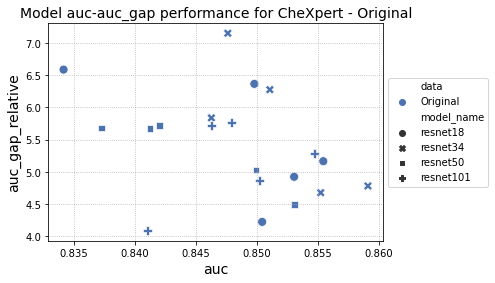

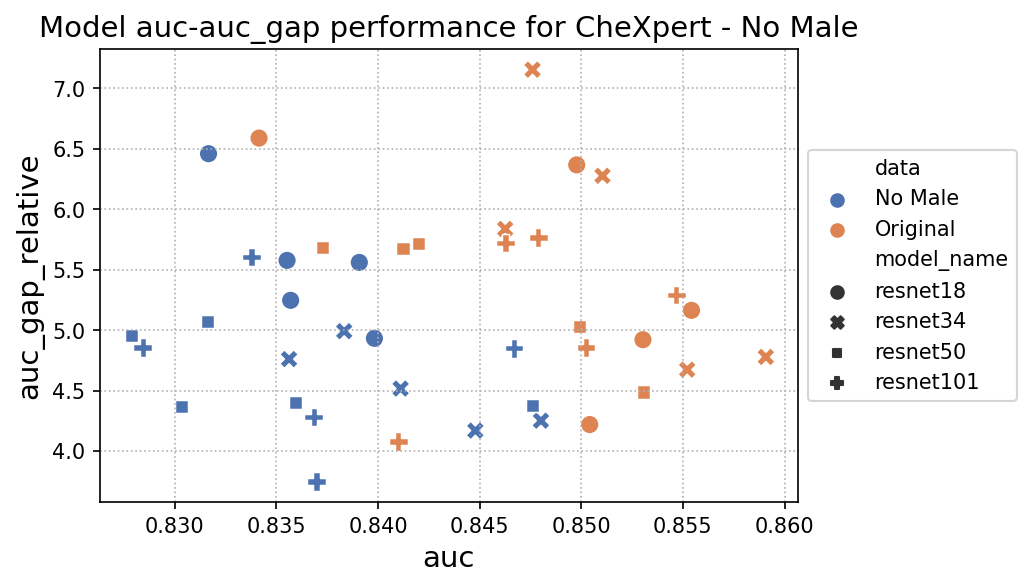

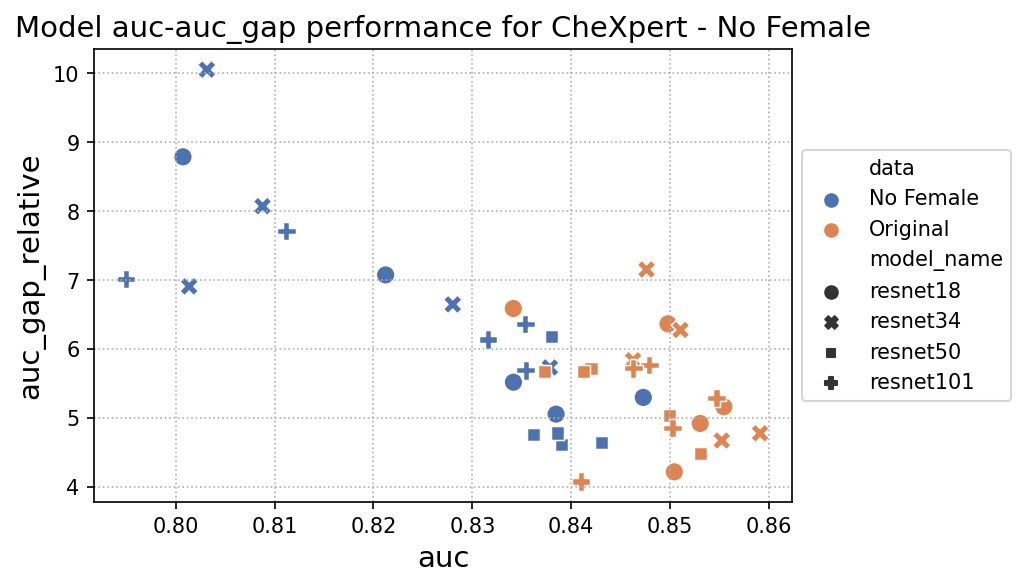

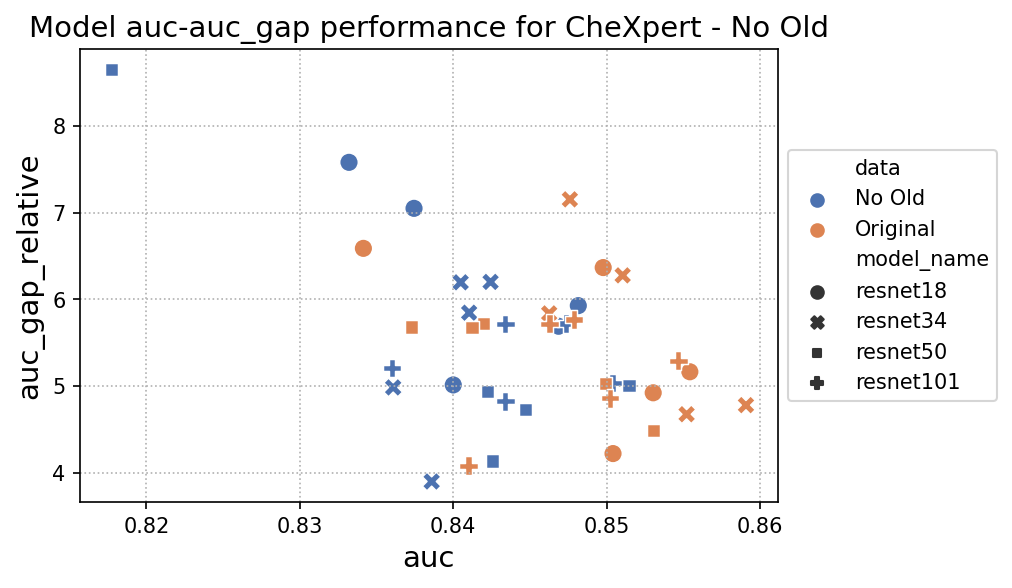

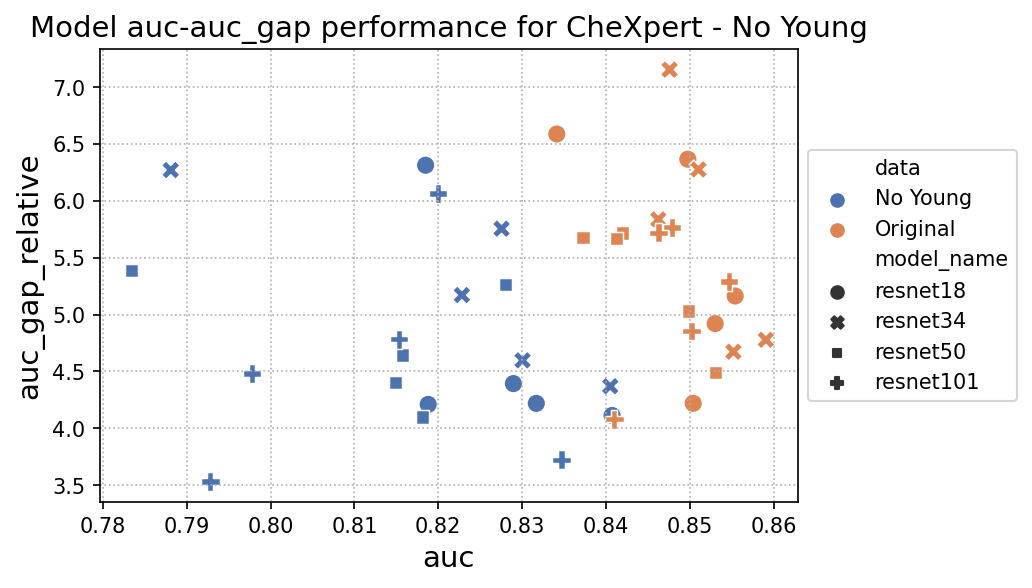

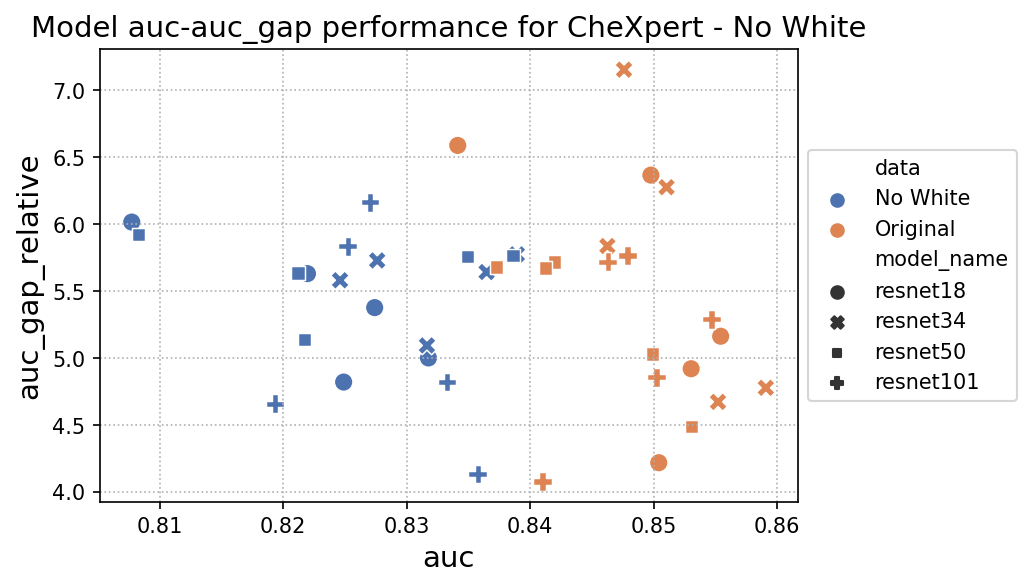

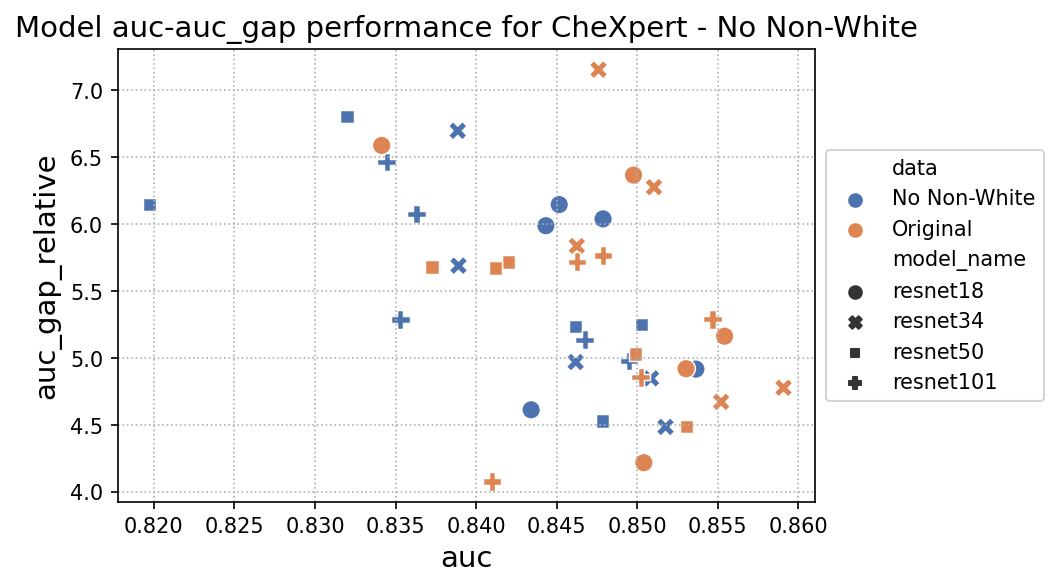

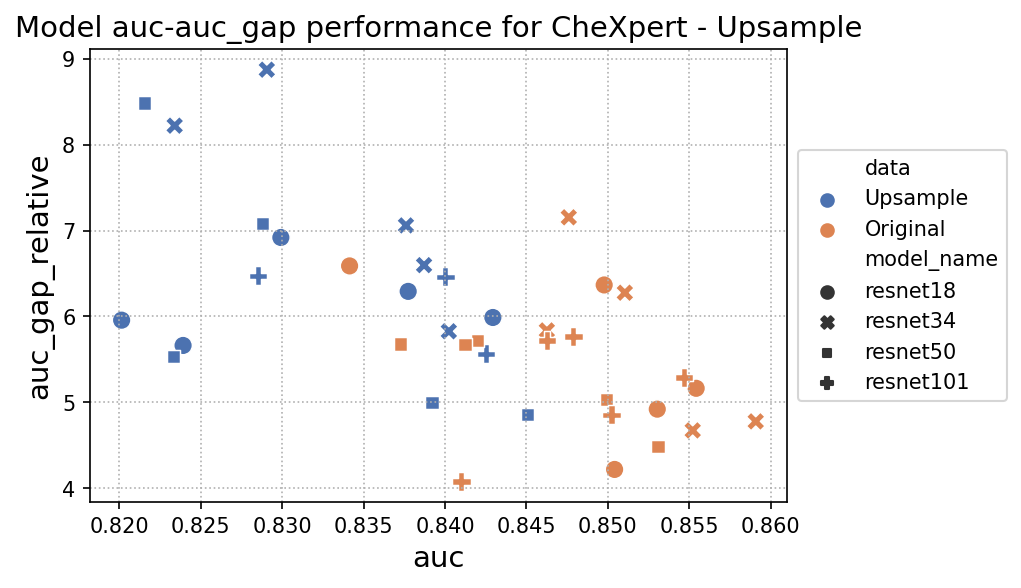

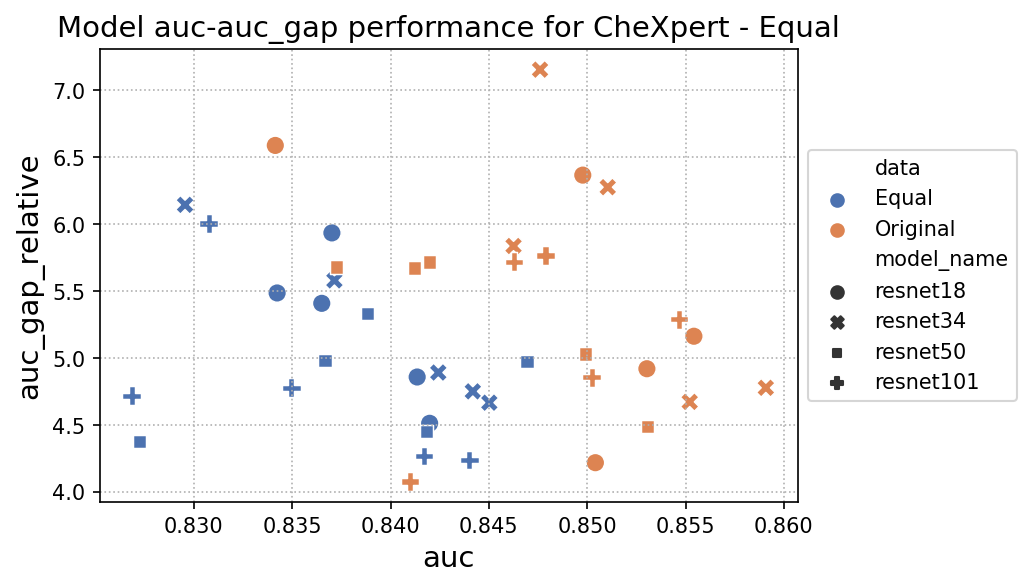

In [23]:
for df, df_name in df_tuples:
    two_data_model_performance((df, df_name), (original_df, 'Original'), 'auc', 'auc_gap_relative', 'Model auc-auc_gap performance for CheXpert - ' + df_name)
    # two_data_model_performance((df, df_name), (original_df, 'Original'), 'auc', 'auc_gap', 'Model auc-auc_gap performance for CheXpert - ' + df_name)

#### Individual Model Performance across all datasets (AUC - AUC_gap)

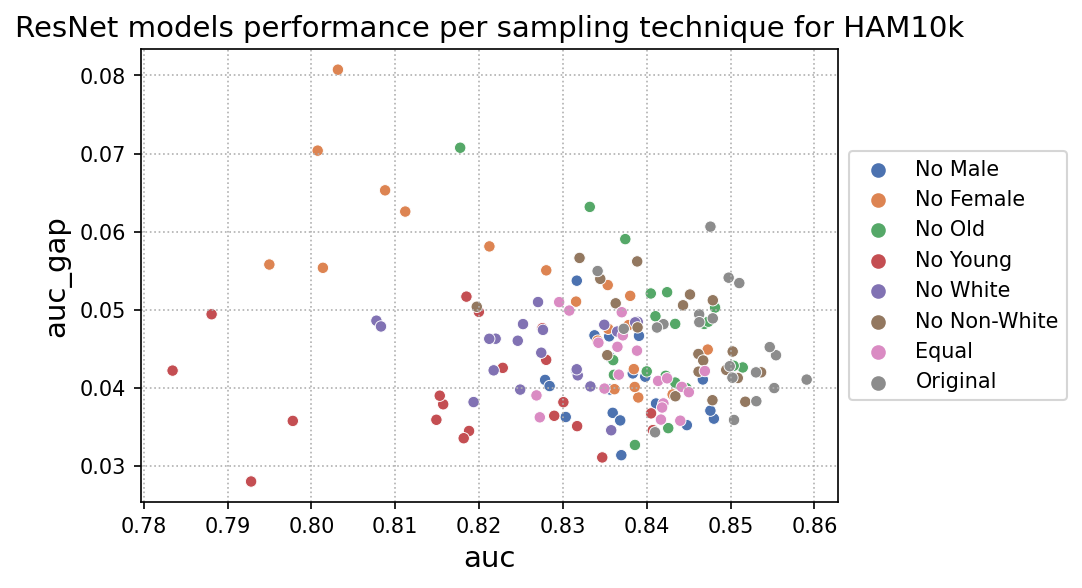

In [21]:
def all_models_scatter(
    df,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):    
    ### TODO: Delete that 
    # df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
    # df = df[df['seed'].isin([45, 46])]

    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", palette="deep", s=30)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

dfs_data = []

for tuple in df_tuples:
    df, df_name = tuple
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df['data'] = df_name
    dfs_data.append(df)

# # CREATE A JOINTS DATAFRAME
df = pd.concat(dfs_data)
all_models_scatter(df, 'auc', 'auc_gap')

#### Box Plot for all datasets

In [16]:
def all_data_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    
    plt.figure(figsize=(10, 5))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")
        df = df[['model_name' ,metric]]
        df['data'] = df_name
        dfs.append(df)

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)

    # df = df[df['model_name'].isin(['resnet18', 'resnet34'])]

    sns.boxplot(y=metric, x="data", data=df, palette="deep", showmeans=True)
    # sns.stripplot(y=metric_2, x="data", data=df, size=4, color=".3", linewidth=0)

    plt.ylabel(metric)
    plt.xlabel('Data Name')

    plt.show()

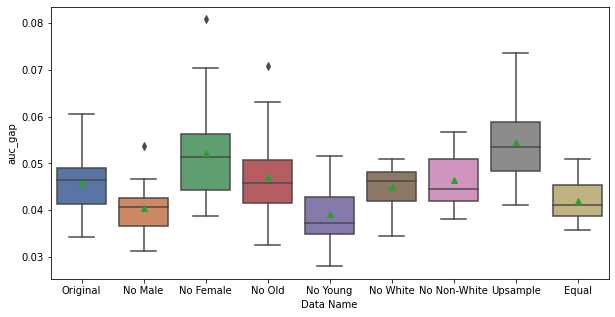

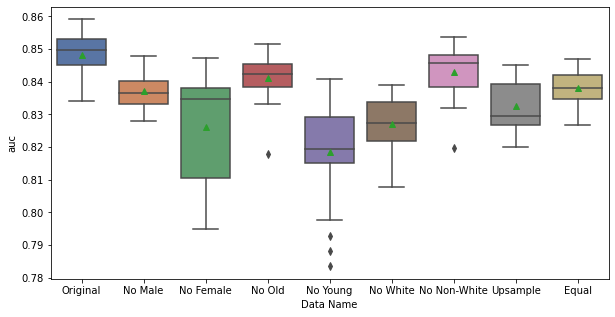

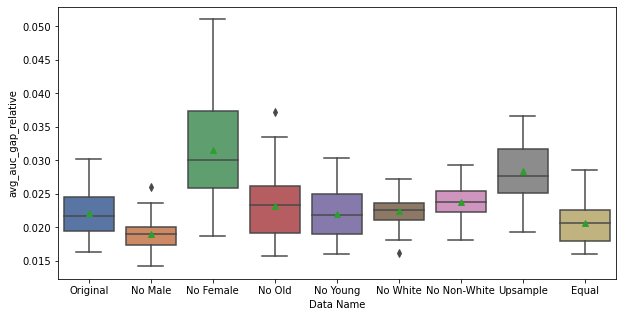

In [18]:
all_data_box_plot(df_tuples, 'auc_gap', 'Ridgeplot of AUC Gap for different datasets')
all_data_box_plot(df_tuples, 'auc', 'Ridgeplot of AUC for different datasets')
all_data_box_plot(df_tuples, 'avg_auc_gap_relative', 'Ridgeplot of AUC for different datasets')



## Lagrange Optimization Fairness
- for finding fair students/teachers
- for potentially controlling the level of fairness

In [37]:
fairness_loss_names = {
    1: 'Equal Loss',
    2: 'Equalized Odds',
    3: 'Equal AUC',
}

### Analysis

#### HEATMAP of different epsilon - lagrange combinations

In [98]:
def plot_lagrange_heatmap(
    df: pd.DataFrame,
    title: str = 'Lagrange Multiplier Heatmap',
    metric: str = 'auc'
):
    
    # Average over the seeds
    df = df[df['auc'] > 0.8]
    df = df.groupby(['model_name', 'fairness_loss', 'epsilon', 'lagrange'])[metric].mean().reset_index()

    df_pivot = df.pivot(index='epsilon', columns='lagrange', values=metric)

    plt.rcParams['figure.dpi'] = 150
    plt.figure(figsize=(7, 4))
    sns.heatmap(df_pivot, annot=True, fmt=".3f")
    plt.title(title)
    plt.show()

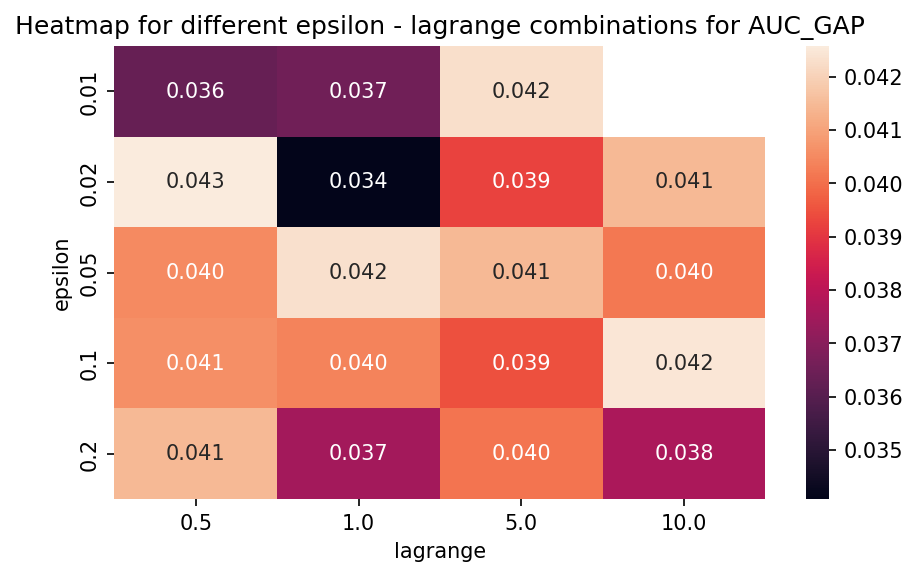

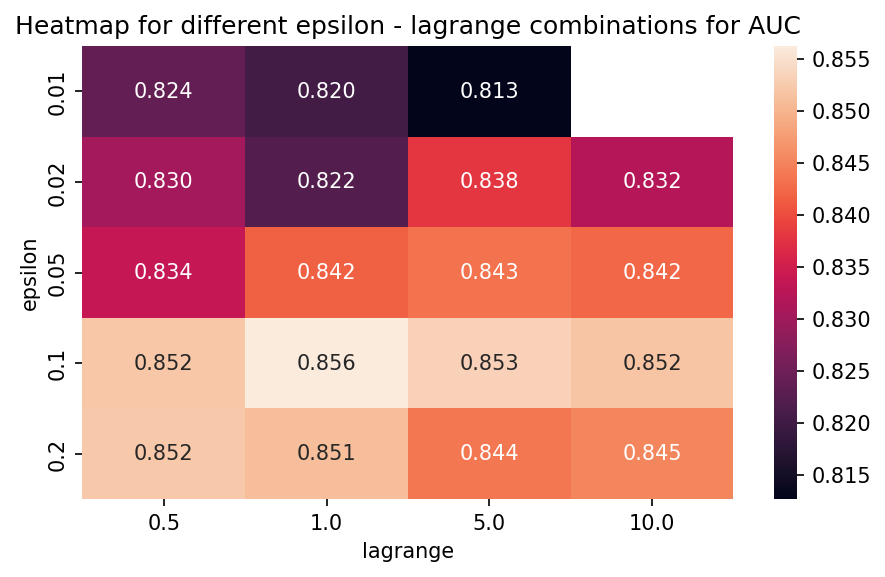

In [99]:

plot_lagrange_heatmap(
    fair_loss_df,
    'Heatmap for different epsilon - lagrange combinations for AUC_GAP',
    metric='auc_gap'
)
plot_lagrange_heatmap(
    fair_loss_df,
    'Heatmap for different epsilon - lagrange combinations for AUC',
    metric='auc'
)

#### Scatter Plots

In [39]:
def plot_lagrange_model_performance(
    df: pd.DataFrame,
    metric_1: str,
    metric_2: str,
    title: str = ''
):
    df['fairness_loss'] = df['fairness_loss'].replace(fairness_loss_names)
    df = df[['fairness_loss', 'model_name', metric_1, metric_2]]

    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="fairness_loss", palette="deep")
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

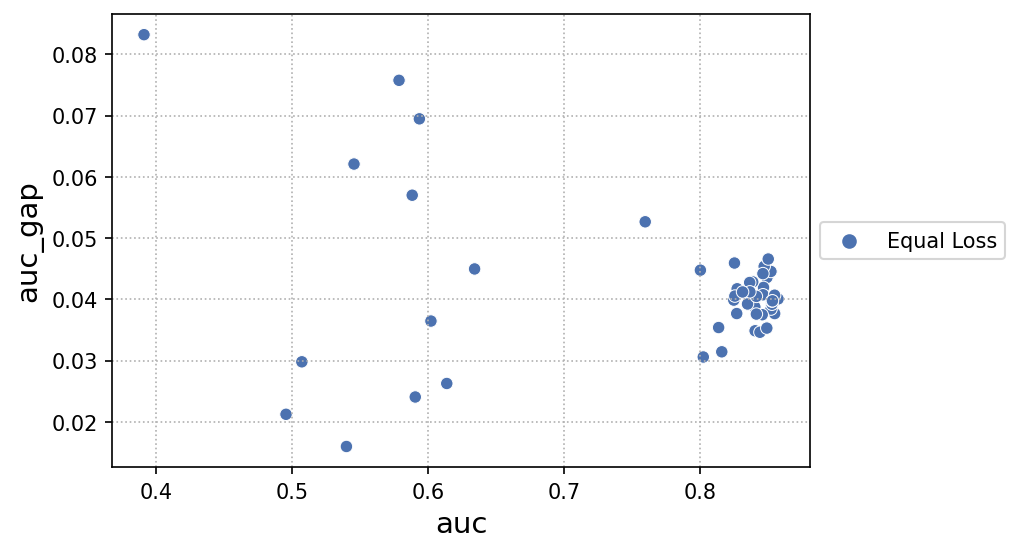

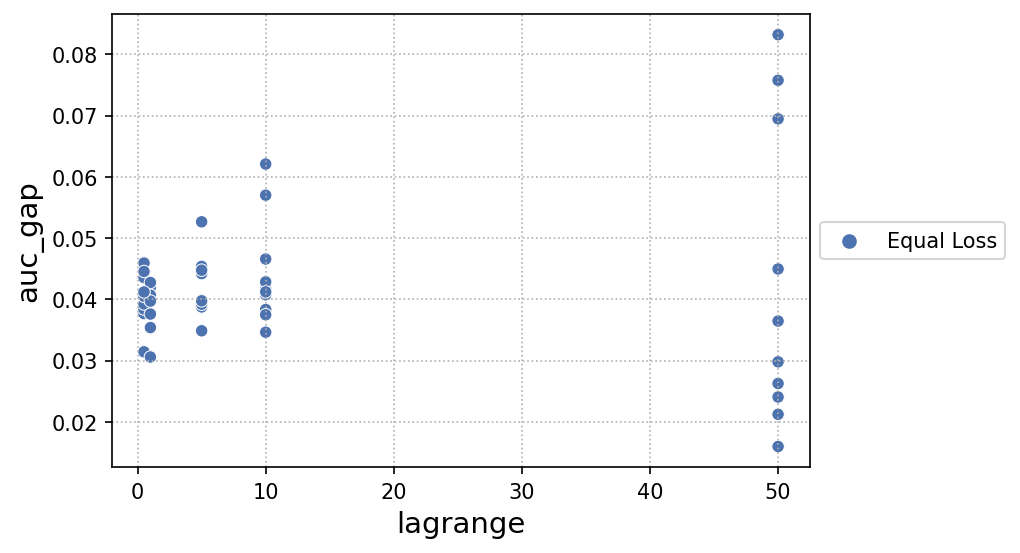

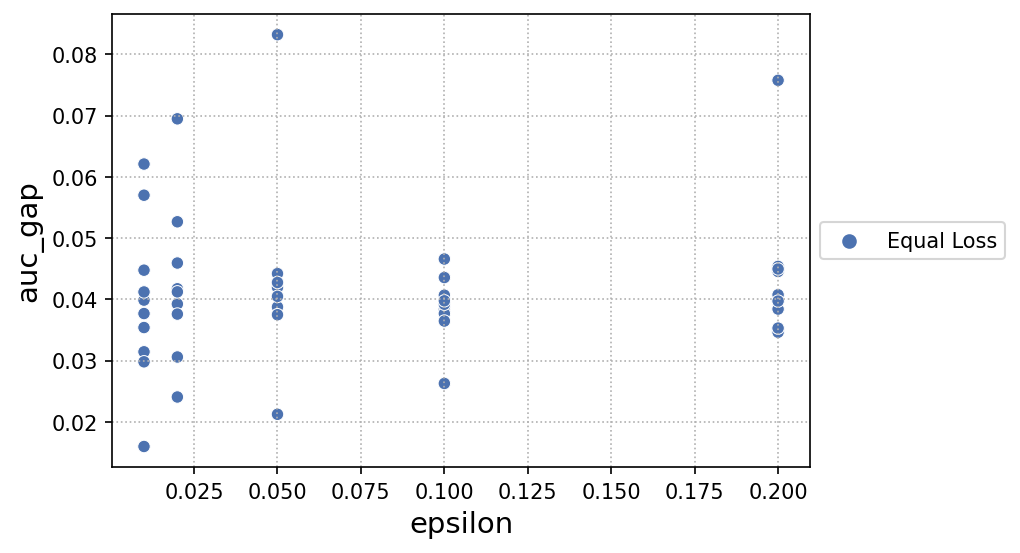

In [42]:
plot_lagrange_model_performance(
    fair_loss_df,
    'auc',
    'auc_gap',
)

plot_lagrange_model_performance(
    fair_loss_df,
    'lagrange',
    'auc_gap',
)

plot_lagrange_model_performance(
    fair_loss_df,
    'epsilon',
    'auc_gap',
)

In [ ]:
def two_data_model_performance(
    df_tuple,
    original_df,
    metric_1: str,
    metric_2: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    # print(df_tuple)
    df, df_name = df_tuple
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df = df[['model_name', metric_1, metric_2]]
    df['data'] = df_name

    original_df, original_df_name = original_df
    original_df['model_name'] = pd.Categorical(original_df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    original_df = original_df.sort_values("model_name")
    original_df = original_df[['model_name', metric_1, metric_2]]
    original_df['data'] = original_df_name

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat([df, original_df])

    ### TODO: Delete that 
    # df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
    
    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="data", style='model_name', palette="deep", s=80)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

In [23]:
def plot_lagrange_comapred_to_original_model_performance(
    df: pd.DataFrame,
    original_df: pd.DataFrame,
    metric_1: str,
    metric_2: str,
    title: str = '',
    diff_data_df: pd.DataFrame = None,
    diff_data_name: str = '',
):
    # Filter df
    # df = df[df['auc'] > 0.85]
    df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    df = df.sort_values("model_name")
    df = df[['fairness_loss', 'model_name', metric_1, metric_2]]
    df['fairness_loss'] = df['fairness_loss'].replace(fairness_loss_names)

    original_df = original_df[original_df['sampling_technique'] == 1]
    original_df['model_name'] = pd.Categorical(original_df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
    original_df = original_df.sort_values("model_name")
    original_df = original_df[['model_name', metric_1, metric_2]]
    original_df['fairness_loss'] = 'original'

    if diff_data_df is not None:
        diff_data_df = diff_data_df[['model_name', metric_1, metric_2]]
        diff_data_df['fairness_loss'] = diff_data_name
        df = pd.concat([df, original_df, diff_data_df])
    else:
        df = pd.concat([df, original_df])


    #FILTER ONLY RESNET50s
    # df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

    plt.rcParams['figure.dpi'] = 150
    ax = sns.scatterplot(data=df, x=metric_1, y=metric_2, hue="fairness_loss", style='model_name', palette="deep", s=70)
    legend = plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        columnspacing=0.2,
    )

    ax.set_xlabel(metric_1, fontsize=14)
    ax.set_ylabel(metric_2, fontsize=14)
    ax.set_title(title, fontsize=14)

    ax.grid(linestyle='dotted')

    plt.show()

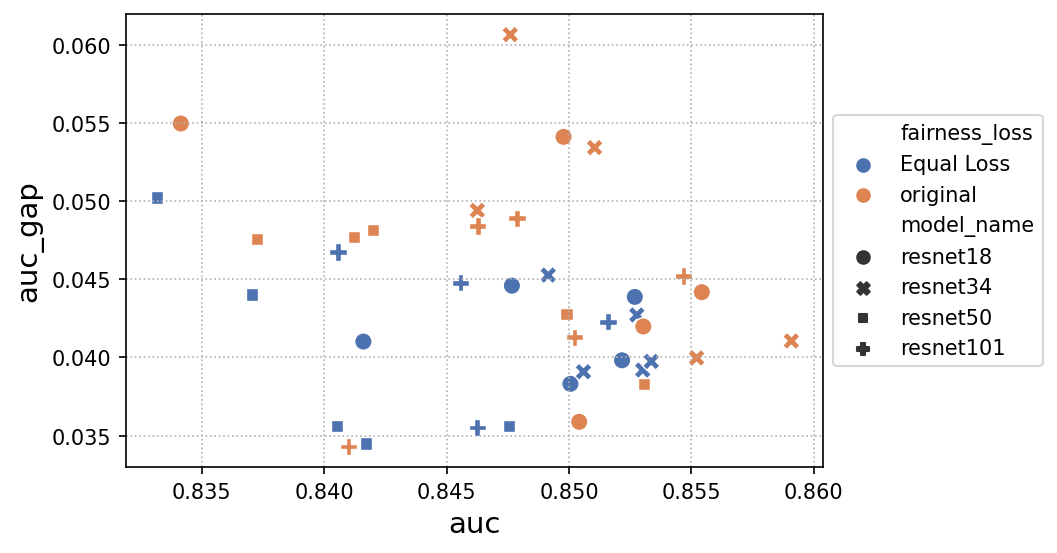

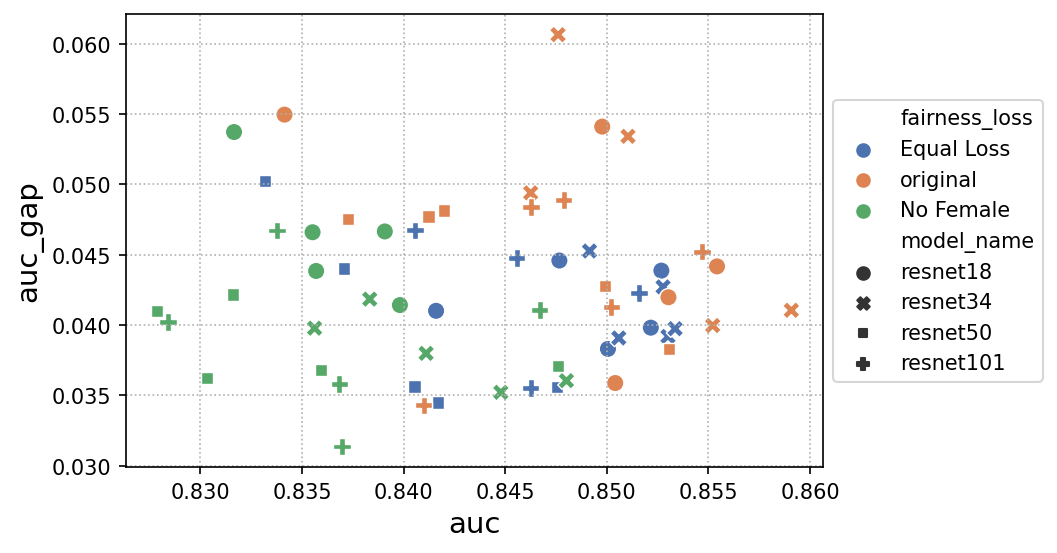

In [25]:
filtered_fair_df = fair_loss_df[fair_loss_df['epsilon'].isin([0.1, 0.2])]
filtered_fair_df = filtered_fair_df[filtered_fair_df['lagrange'].isin([0.5, 1.0, 5.0, 10.0])]

plot_lagrange_comapred_to_original_model_performance(
    filtered_fair_df,
    original_df,
    'auc',
    'auc_gap',
)

plot_lagrange_comapred_to_original_model_performance(
    filtered_fair_df,
    original_df,
    'auc',
    'auc_gap',
    diff_data_name='No Female',
    diff_data_df=no_male_df,
) 

#### Data Skewing with Lagrange Models and Original Data Comparison

In [61]:
def data_lagrange_original_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k'
):
    
    plt.figure(figsize=(10, 5))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")
        ### Filter only the models that have an auc > 0.8
        # df = df[df['auc'] > 0.8]
        df = df[['model_name' , metric]]
        df['data'] = df_name
        dfs.append(df)

    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)

    ## FILTER ONLY RESNET50s
    # df = df[df['model_name'] == 'resnet50']

    sns.boxplot(y=metric, x="data", data=df, palette="deep", showmeans=True)
    # sns.stripplot(y=metric_2, x="data", data=df, size=4, color=".3", linewidth=0)

    plt.title(f'BoxPlot of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Data Name')

    plt.show()

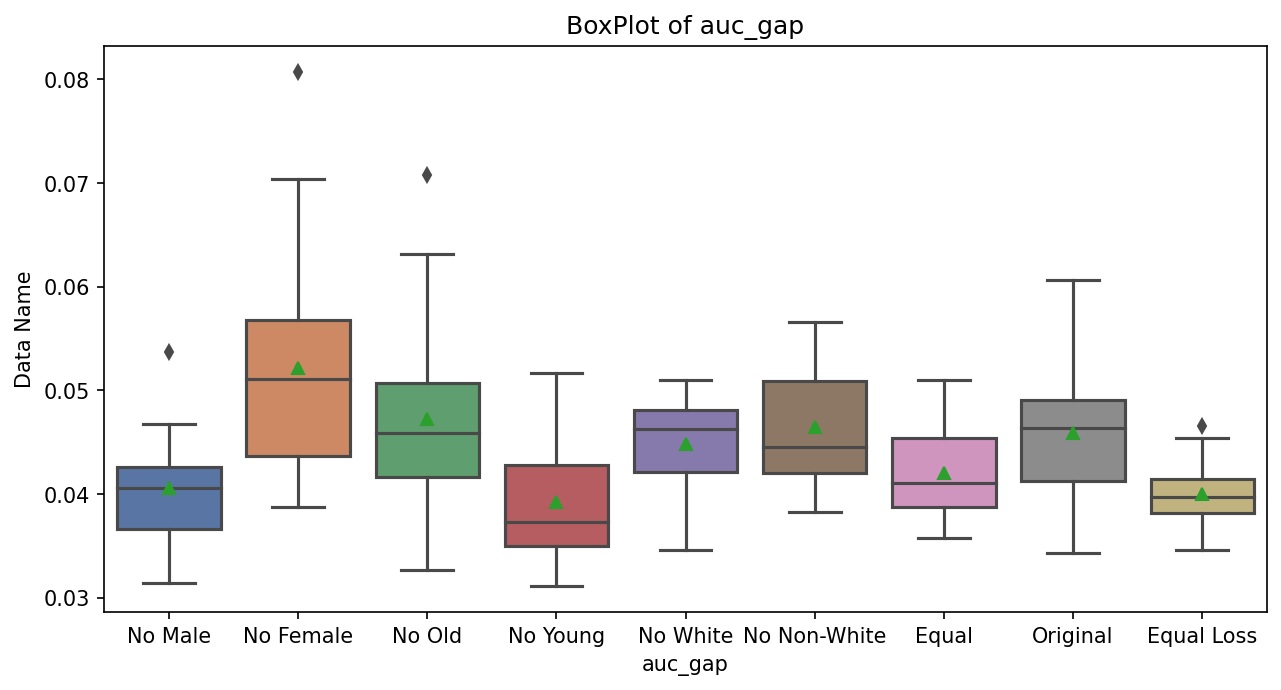

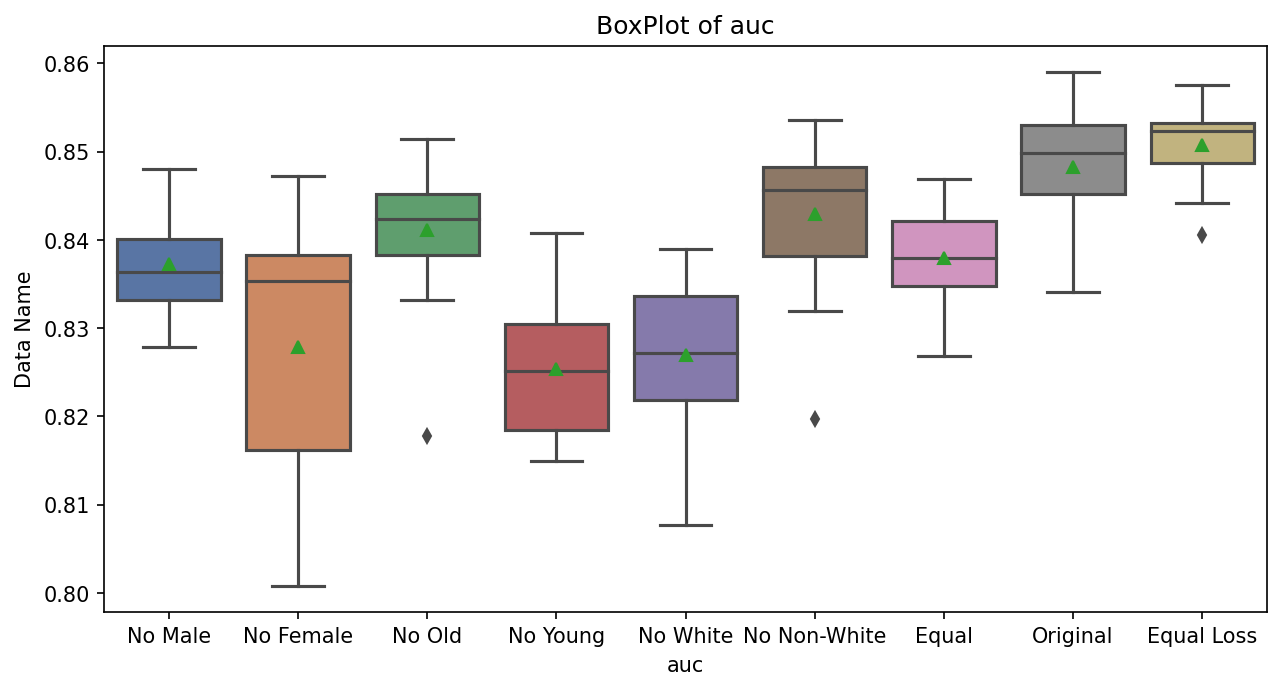

In [106]:

tmp_list = df_tuples + [(filtered_fair_df, 'Equal Loss')]
data_lagrange_original_box_plot(tmp_list, 'auc_gap')
data_lagrange_original_box_plot(tmp_list, 'auc')

## All data

### BoxPlot

In [49]:
def all_data_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k',
    baseline: Optional[float] = None,
    mode: Optional[Literal['all', 'student', 'teacher']] = 'all',
):
    
    plt.rcParams['figure.dpi'] = 250
    plt.figure(figsize=(12, 5))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple
        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")

        if mode == 'student':
            df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
        
        if mode == 'teacher':
            df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

        if df_name == 'Original':
            baseline = df[metric].median()

        df = df[['model_name' , metric]]
        df['data'] = df_name
        dfs.append(df)

        if df_name in ['Original', 'Lagrange', 'Equal\nData', 'Equal\nUpsample', 'Subgroup\nReversed']:
            df['technique'] = 'Fair'
        else:
            df['technique'] = 'Unfair'


    # create a join dataframe with the original and the new results and 'metric_name', 'dataframe_name', metric_1, metric_2
    df = pd.concat(dfs)

    sns.boxplot(
        y=metric, 
        x="data",
        data=df, 
        palette="deep", 
        showmeans=True,
        linewidth=1.5, 
        boxprops=dict(linewidth=0.5), 
        showfliers=False,
        width=0.5, 
        dodge=False,
        hue='technique',
    )


    ax=plt.gca()
    ax.set_facecolor('#F0F0F0')

    plt.xticks(fontsize=12)

    for ytick in ax.get_yticks():
        ax.axhline(y=ytick, linestyle='dotted', linewidth=0.8, color='white', alpha=1, zorder=0)

    plt.legend(loc='upper left', frameon=True)

    plt.axhline(y=baseline, color='r', linestyle='--')

    plt.xlabel('', fontsize=15)
    if metric == 'auc':
        plt.ylabel('AUC', fontsize=15)
    if metric == 'avg_auc_gap_relative':
        plt.ylabel('Avg relative AUC Gap', fontsize=15)
    plt.title(title, fontsize=15)

    plt.show()

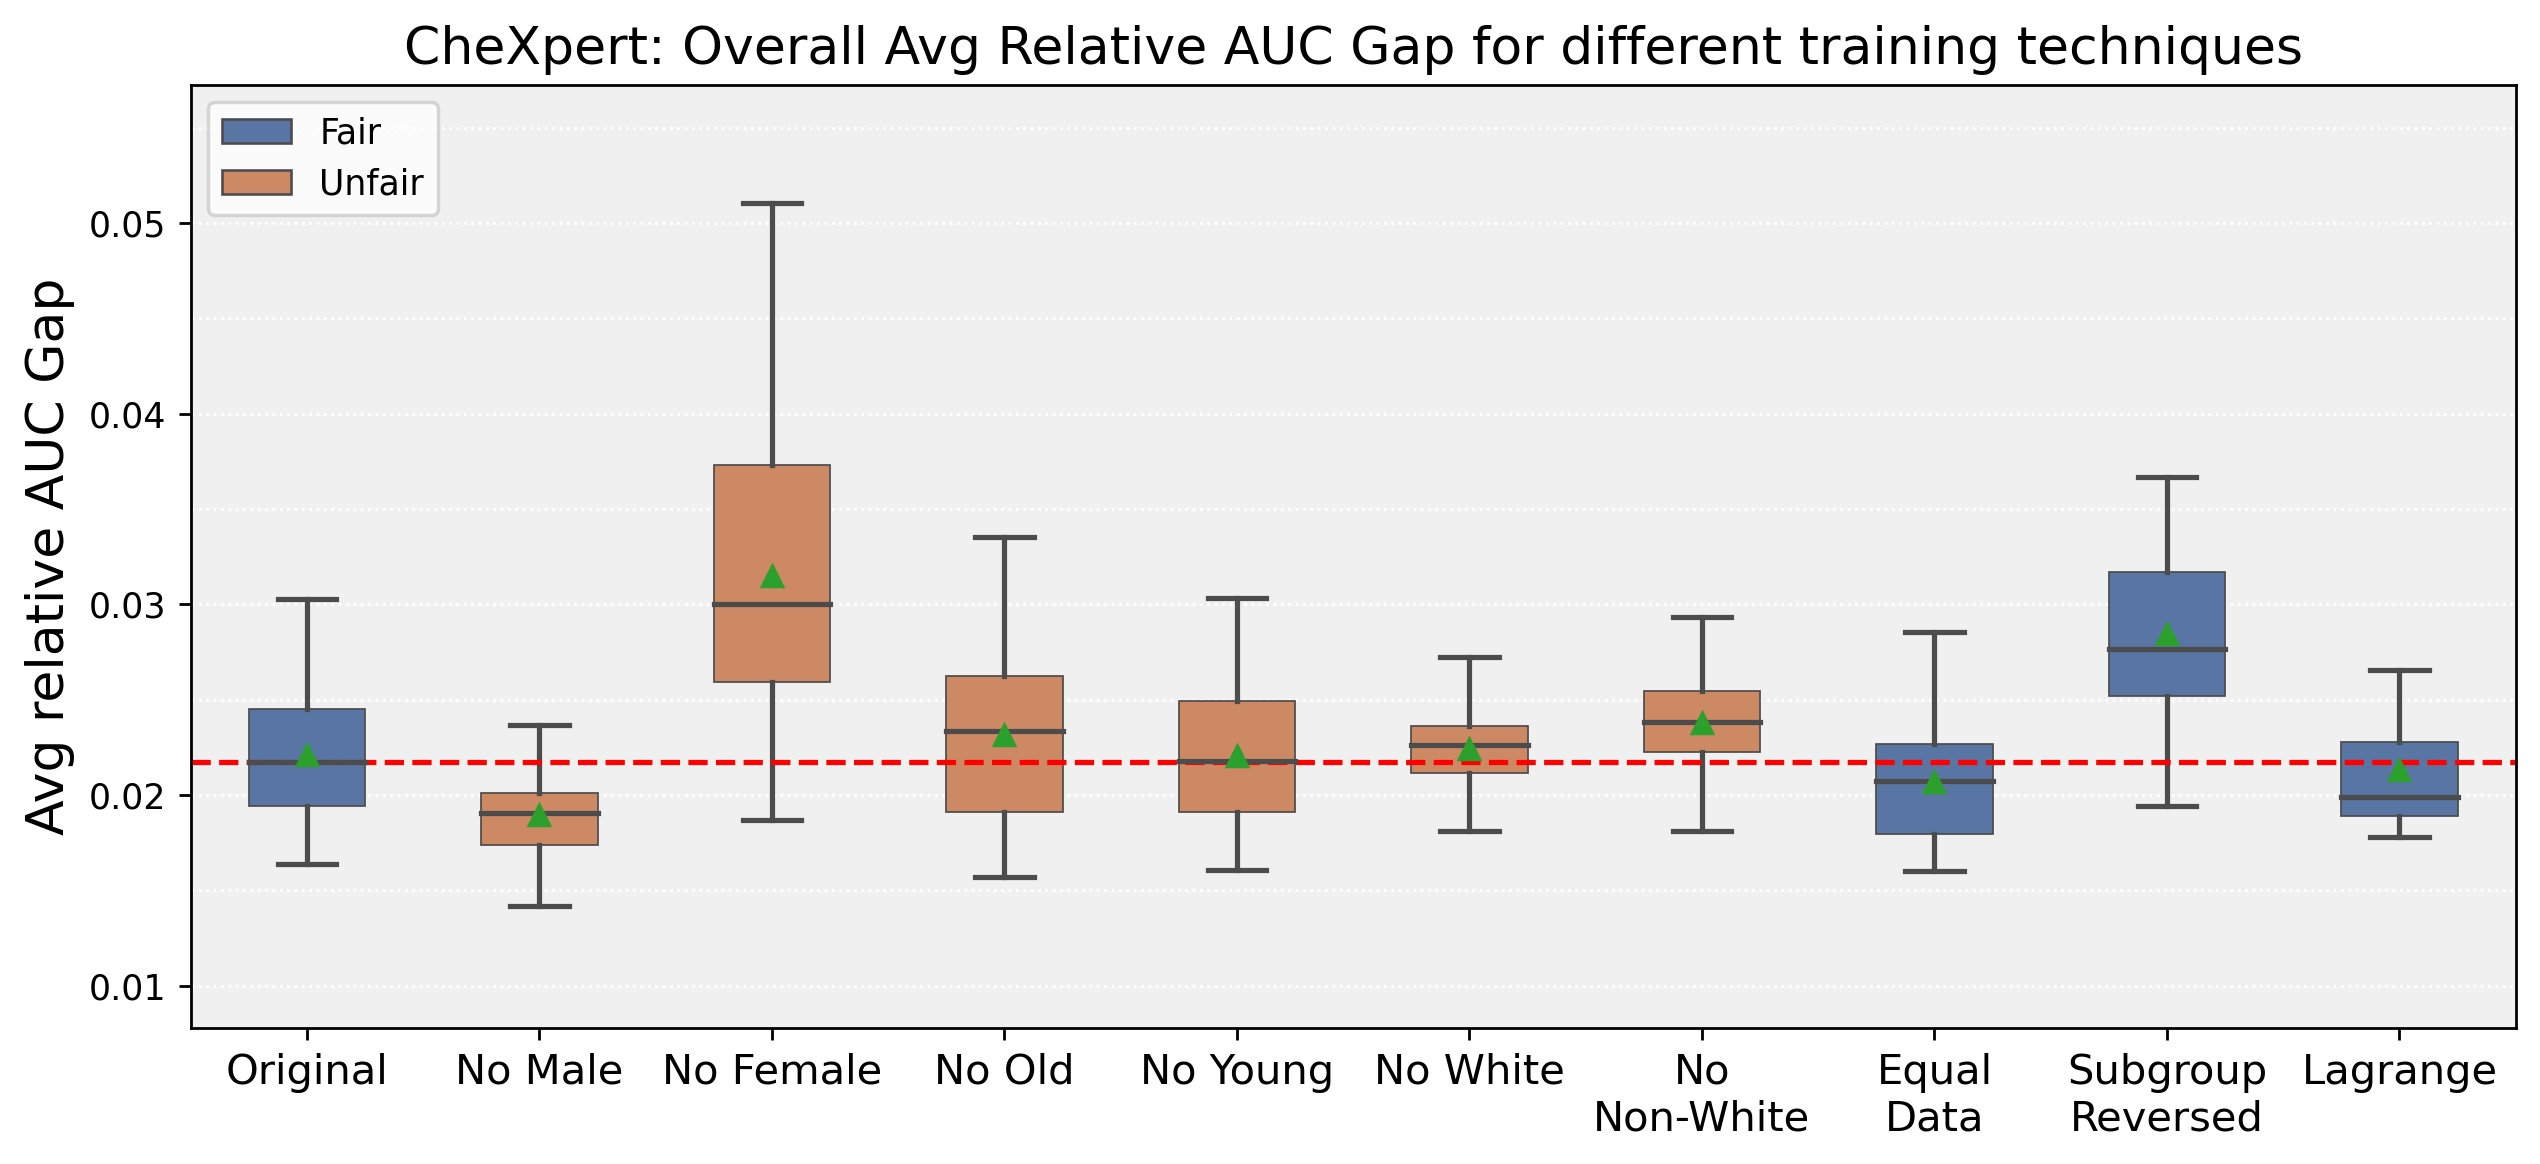

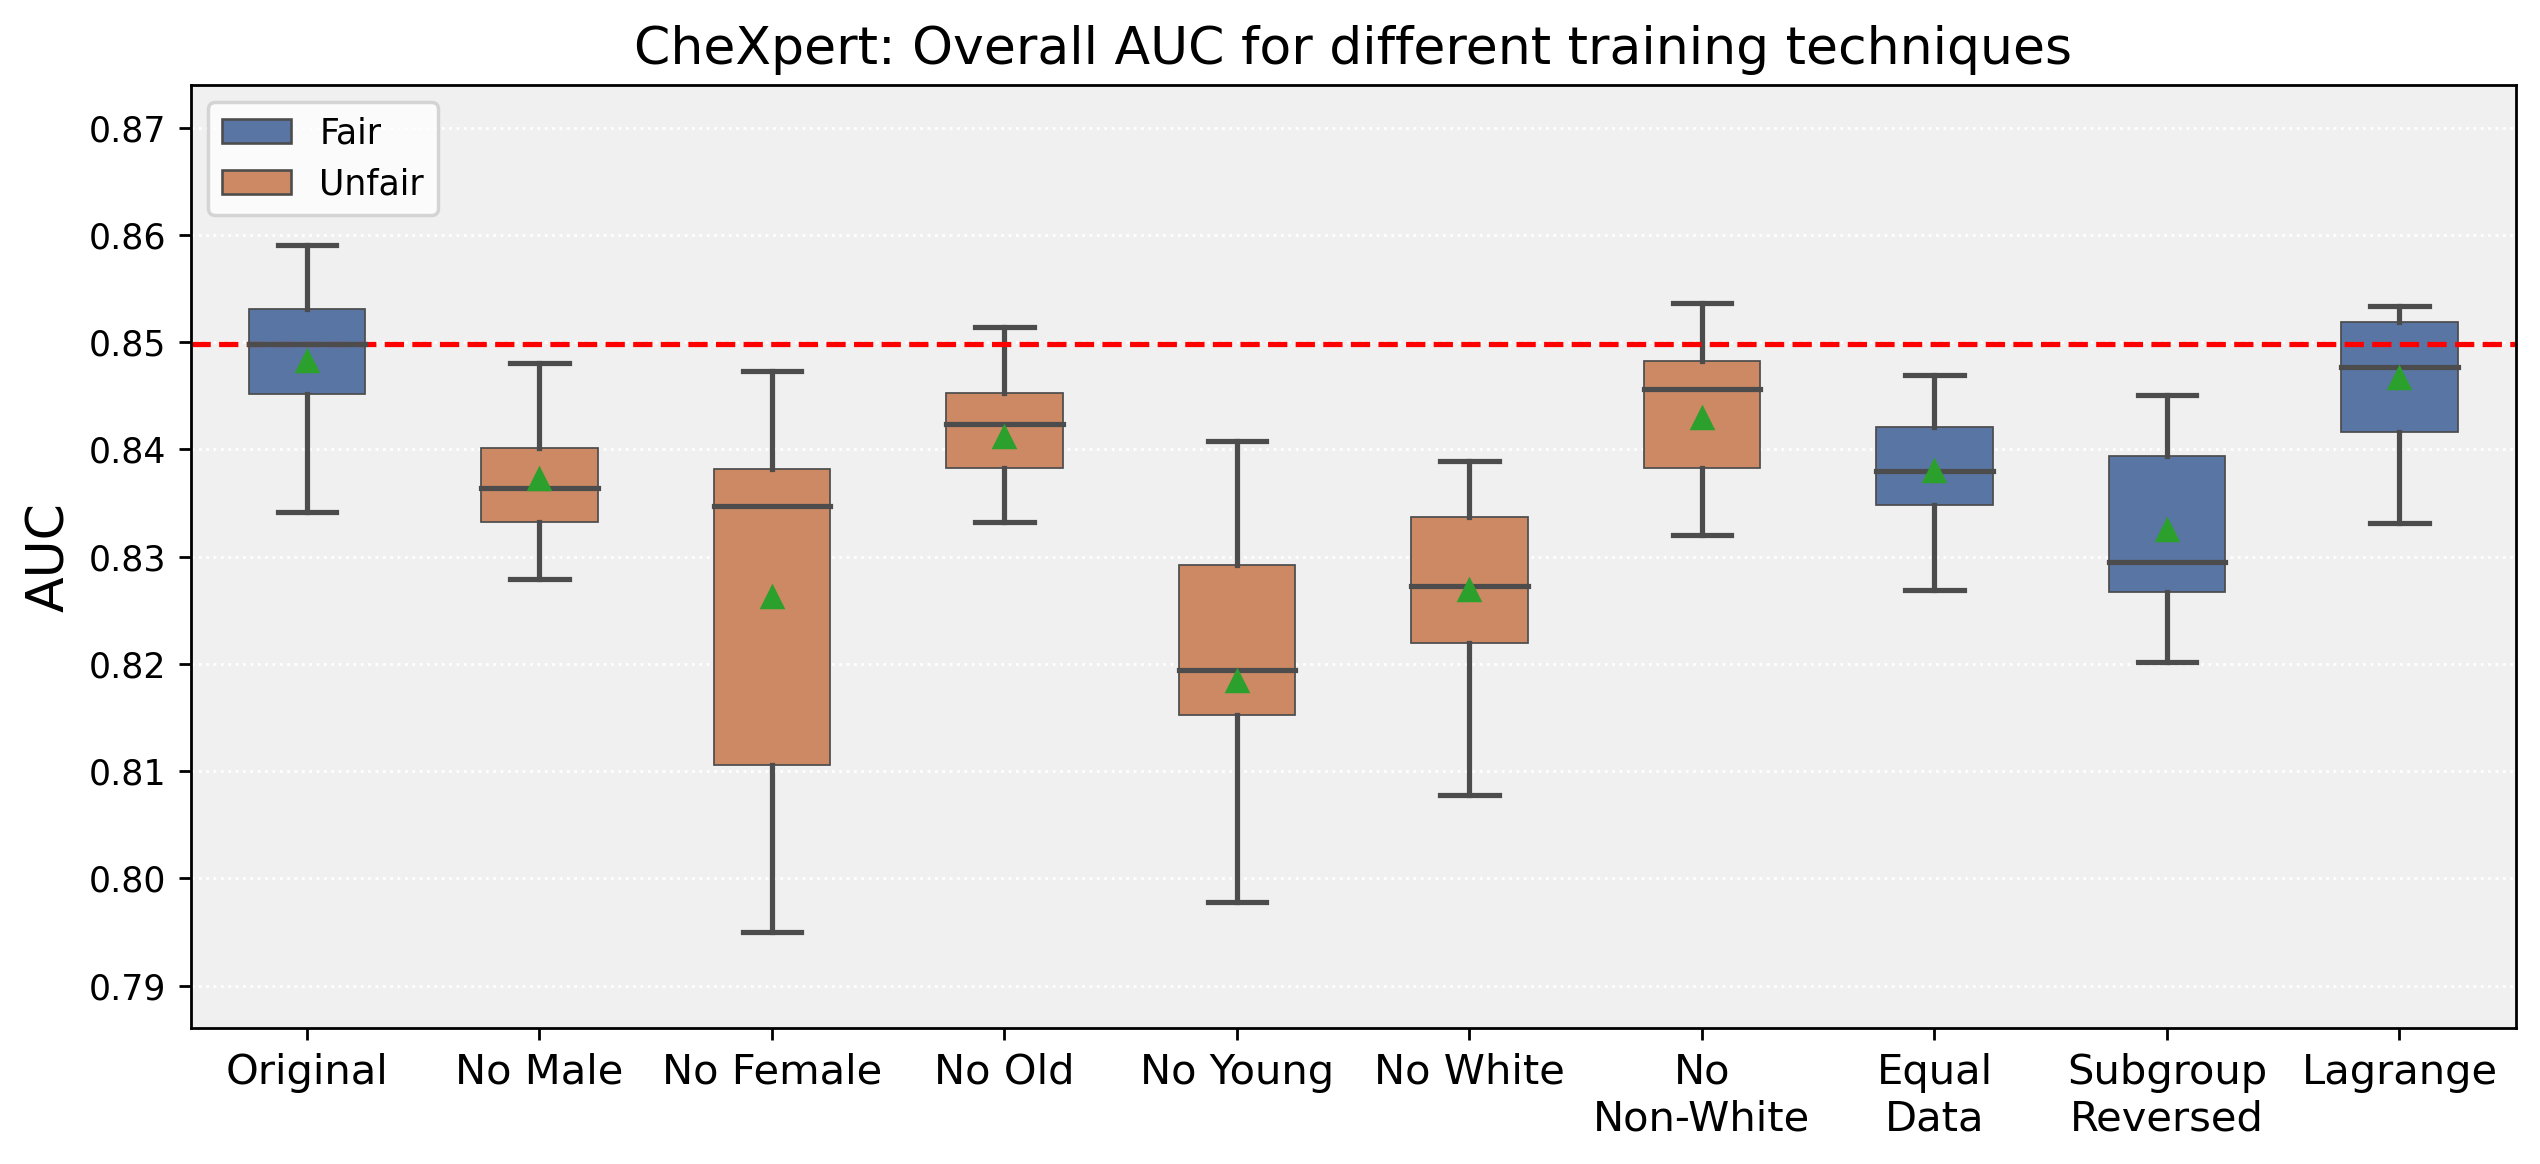

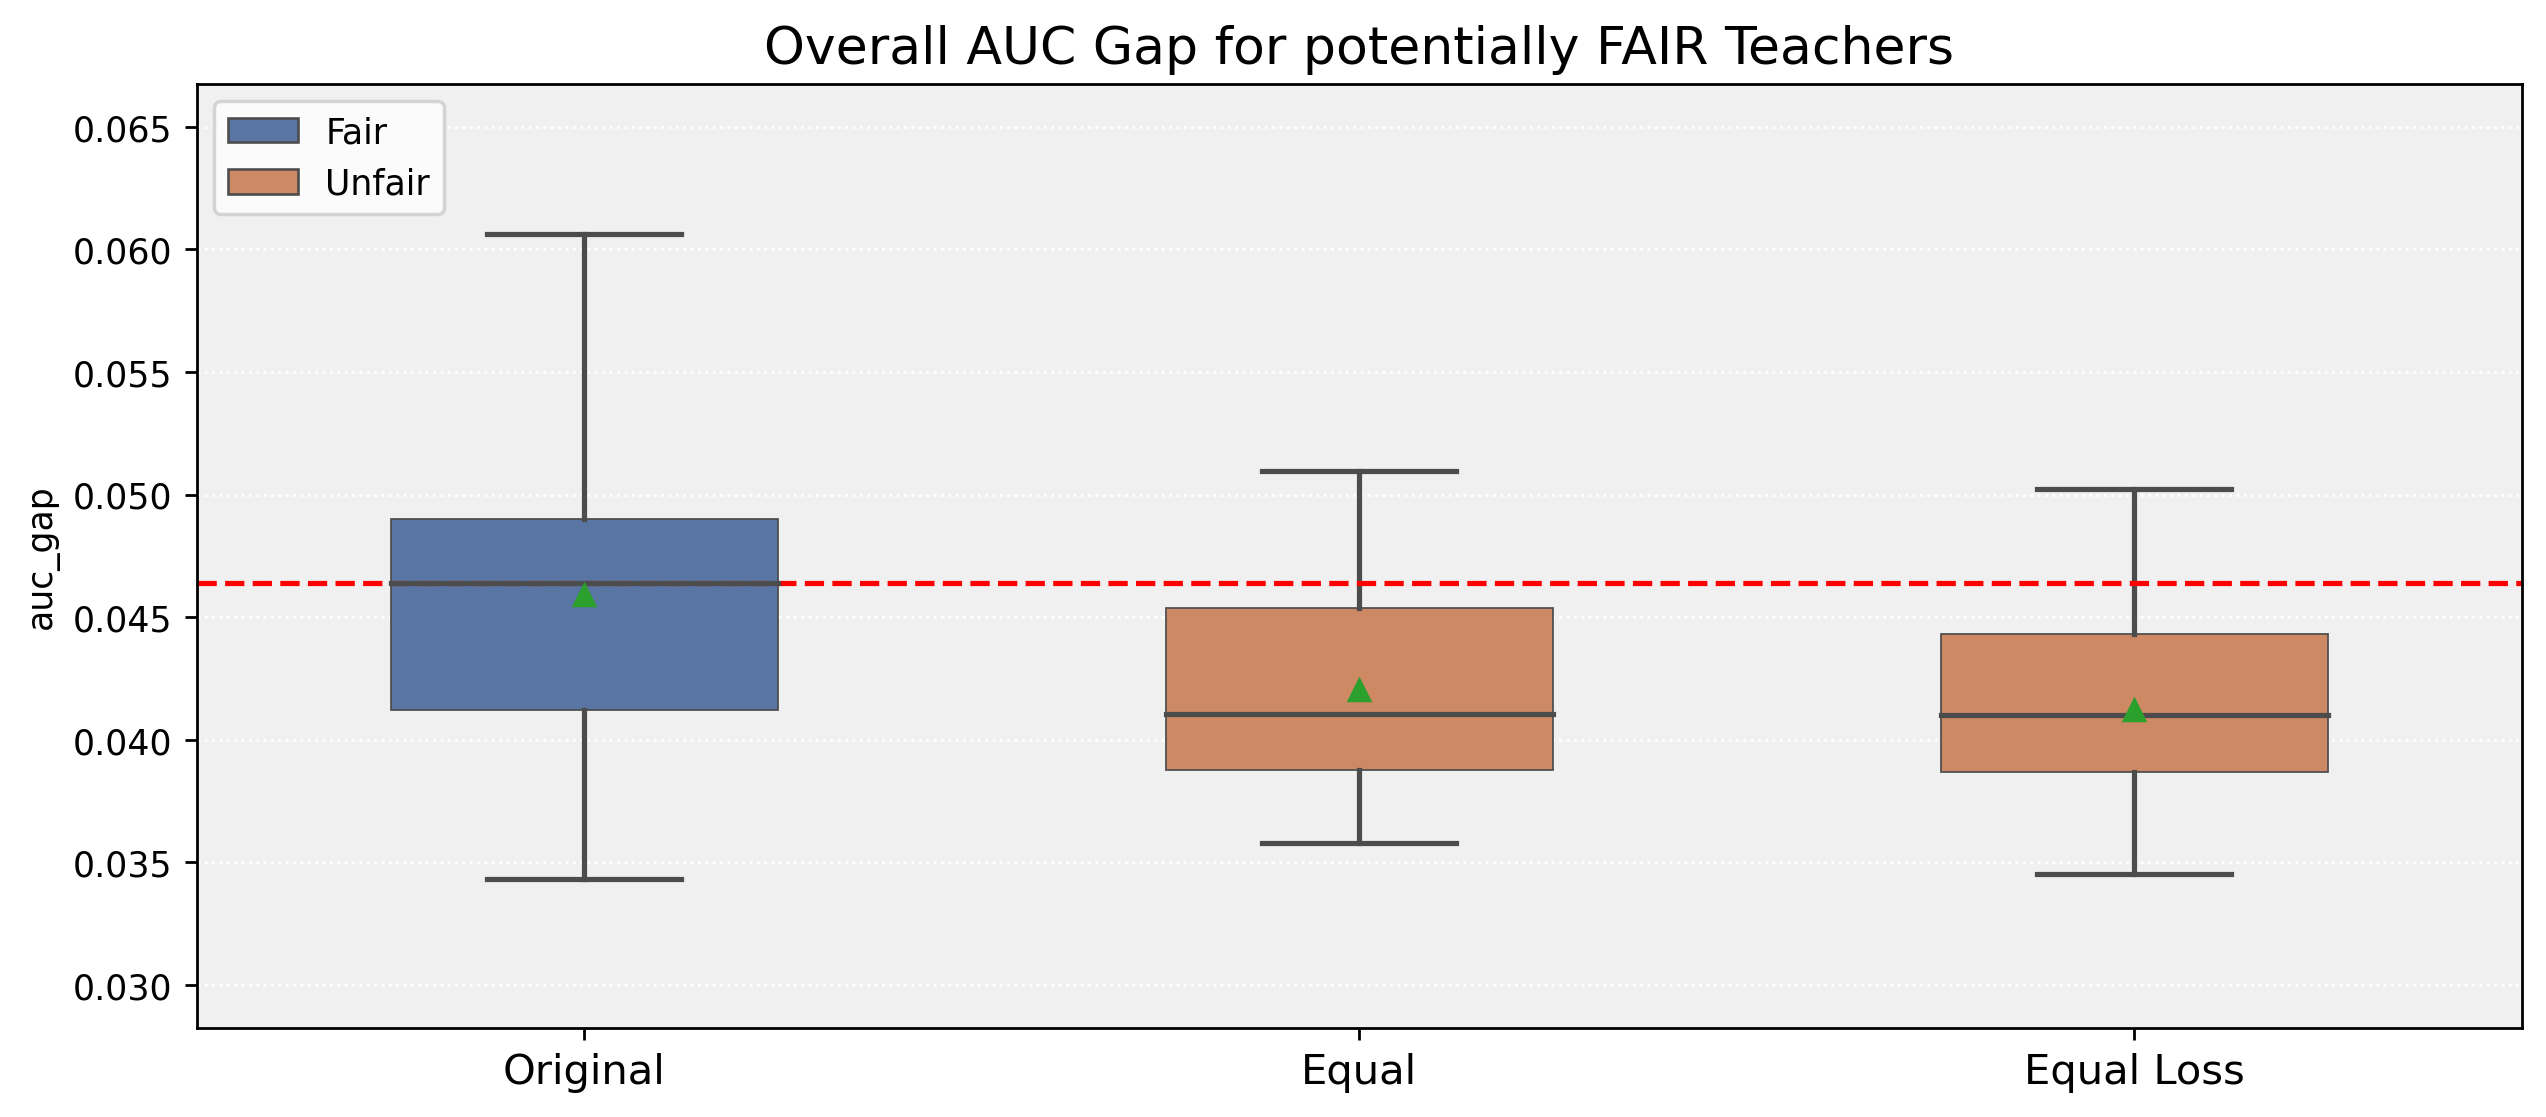

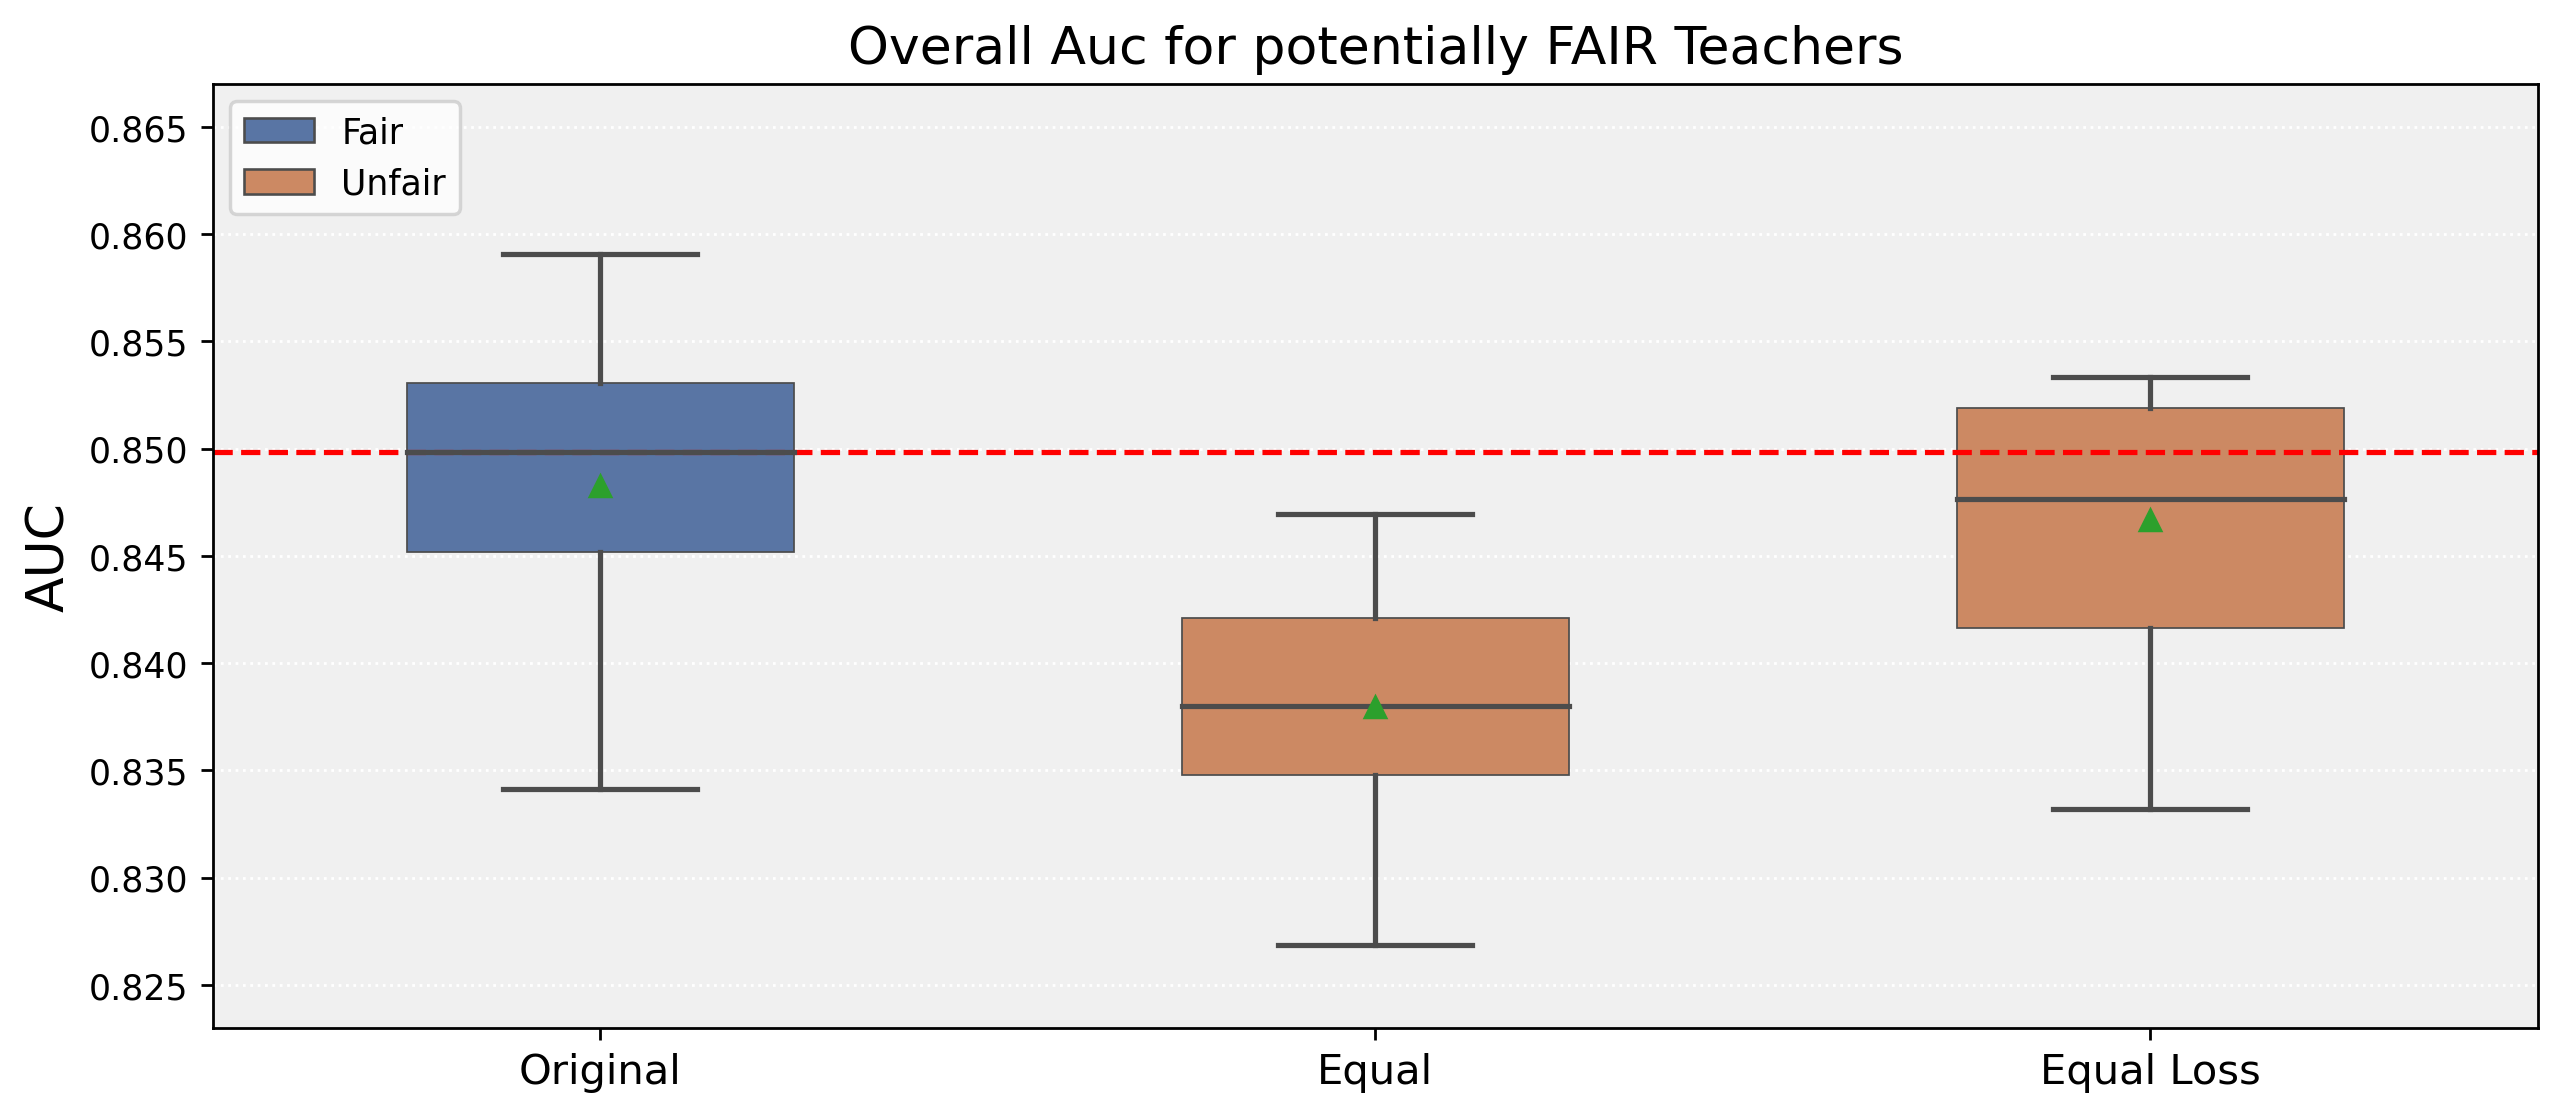

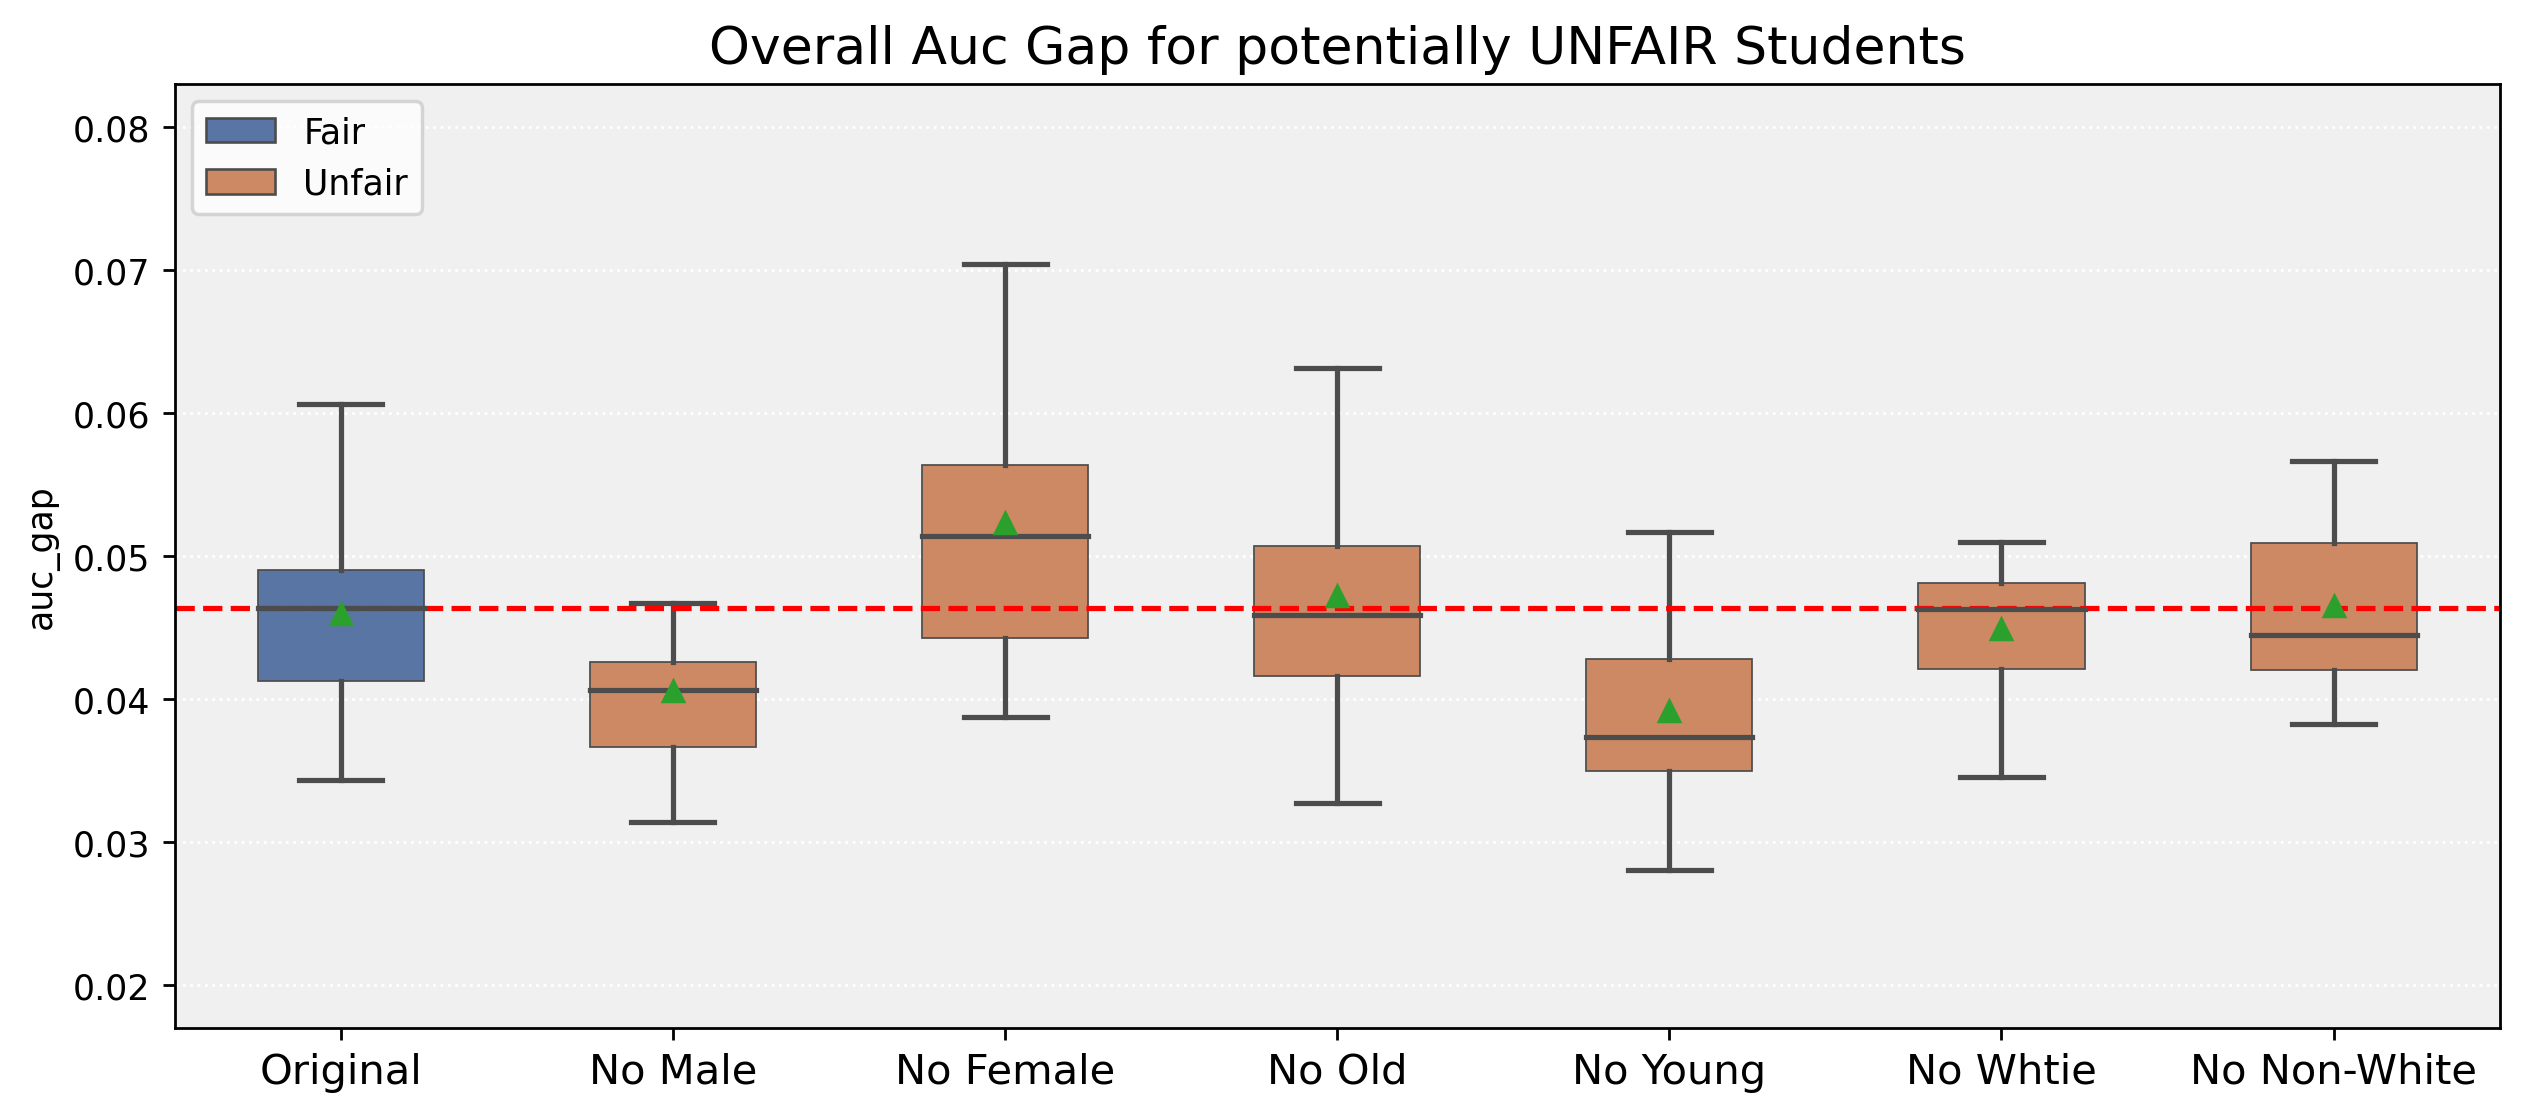

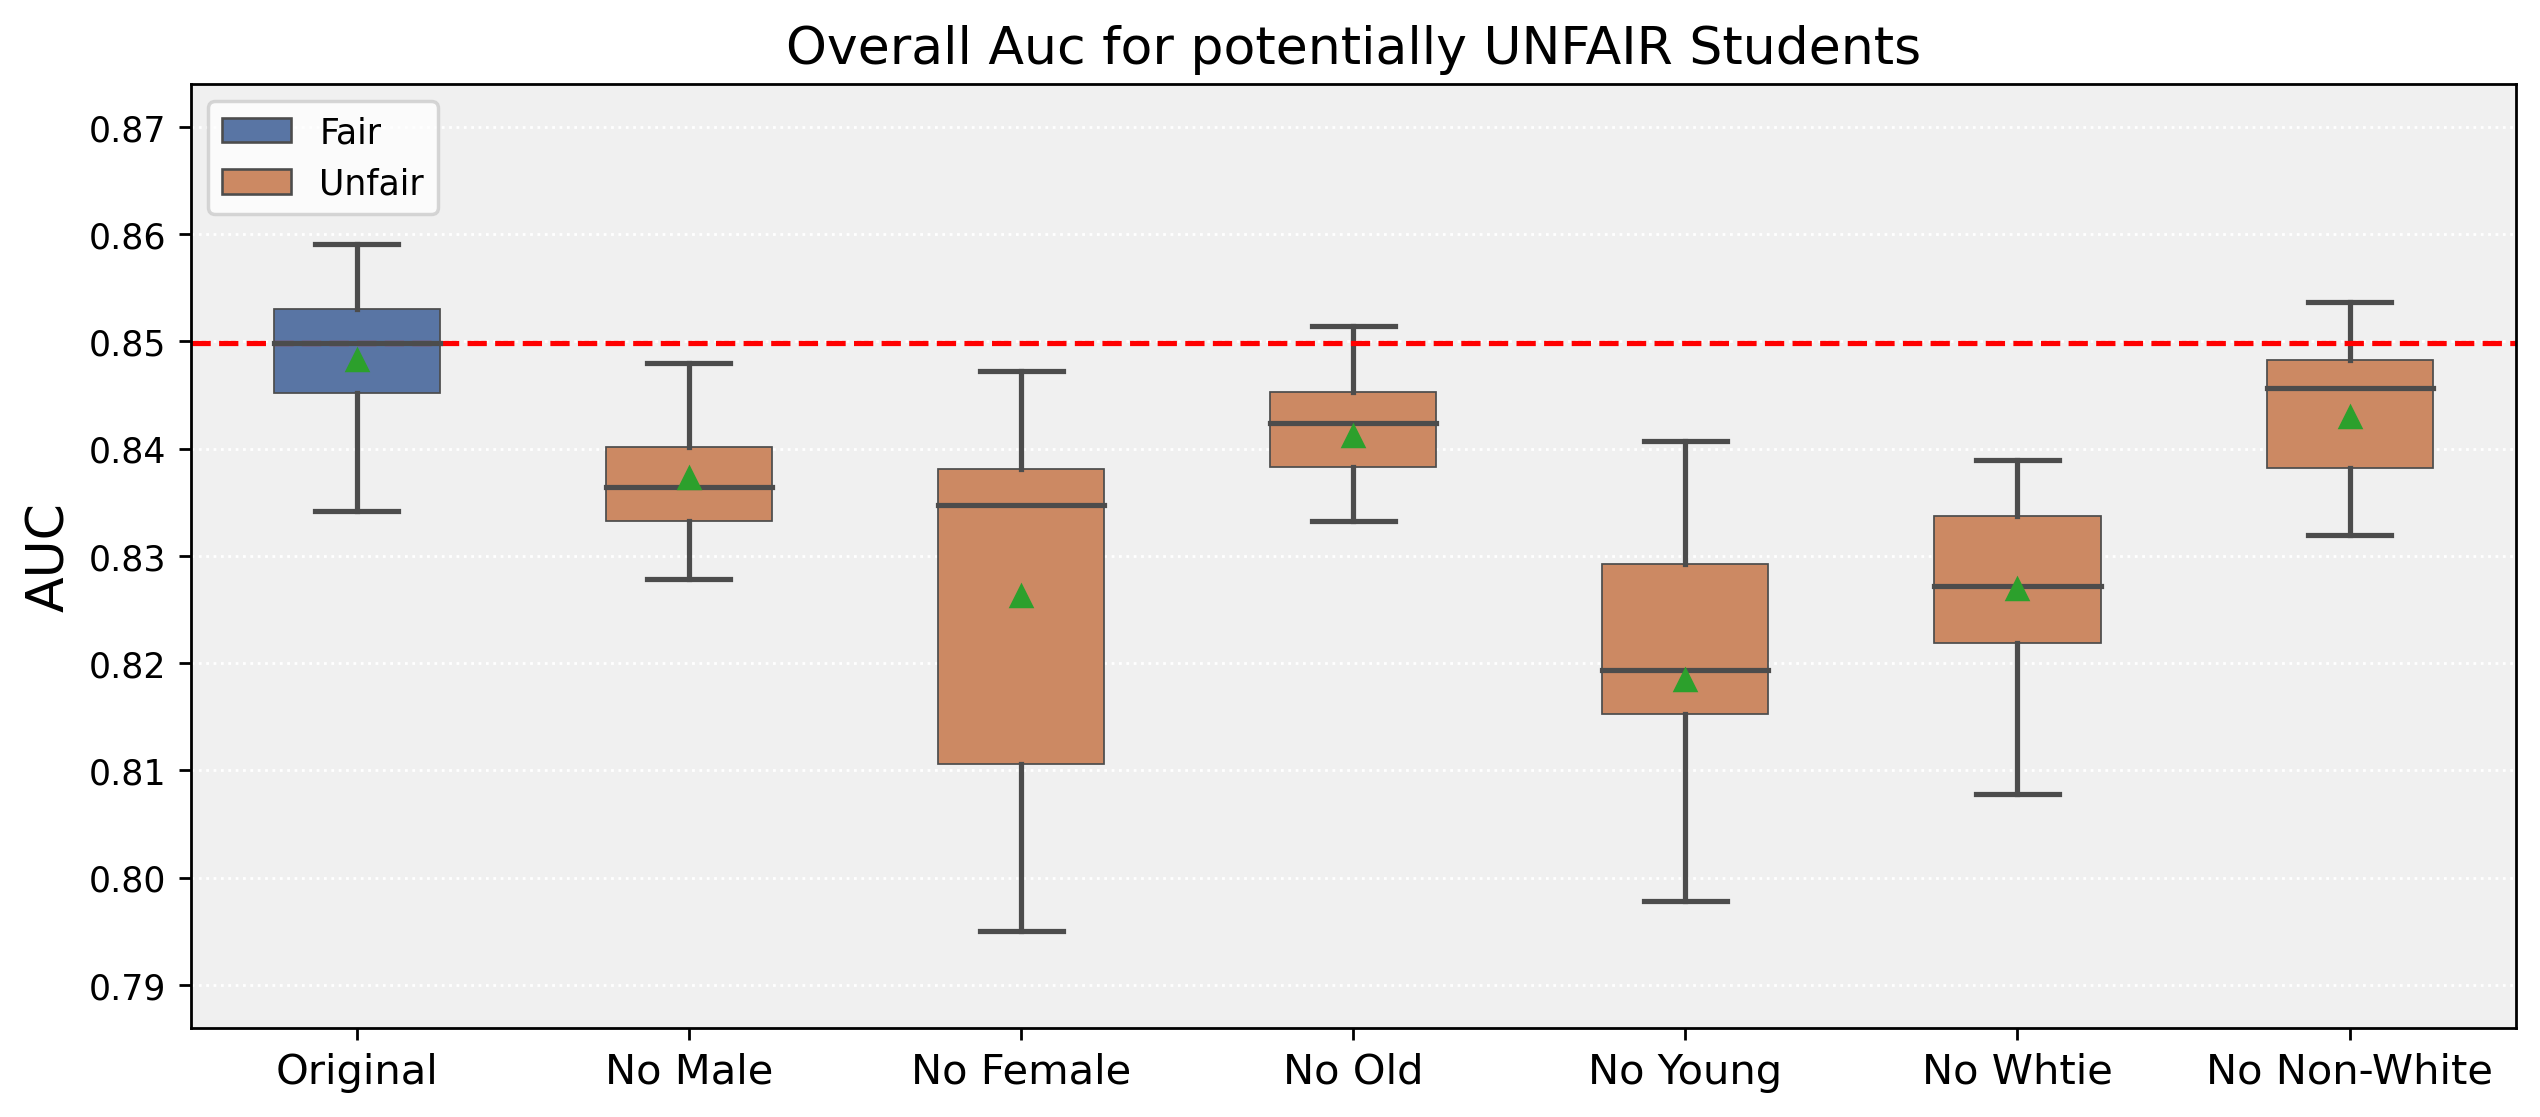

In [54]:


# TODO:
# Maybe put overall performance as well for subgroup?

# #### ALL
# all_data_box_plot(tmp_list, 'auc_gap', baseline=auc_gap_baseline, title='Overall Auc Gap for different training techniques')
# all_data_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='Overall Auc for different training techniques')
# subgroup_box_plot(tmp_list, 'auc_gap', baseline=auc_gap_baseline, title='Auc Gap subgroup performance for different training techniques')
# subgroup_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='Auc subgroup performance for different training techniques')


# #### TEACHERS
# fair_teachers_df_list = [(original_df, 'Original'), (equal_df, 'Equal'), (fair_loss_df, 'Equal Loss')]
# all_data_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='teacher', title='Overall Auc Gap for potentially FAIR Teachers (ResNet50, ResNet101)')
# all_data_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='teacher', title='Overall Auc for potentially FAIR Teachers (ResNet50, ResNet101)')
# subgroup_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='teacher', title='Auc Gap for subgroups in potentially FAIR Teachers (ResNet50, ResNet101)')
# subgroup_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='teacher', title='Auc for subgroups in potentially FAIR Teachers (ResNet50, ResNet101)')


# #### STUDENTS
# unfair_students_df_list = [(original_df, 'Original'), (no_male_df, 'No Male'), (no_female_df, 'No Female'), (no_old_df, 'No Old'), (no_young_df, 'No Young')]
# all_data_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='student', title='Overall Auc Gap for potentially UNFAIR Students (ResNet18, ResNet34)')
# all_data_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='student', title='Overall Auc for potentially UNFAIR Students (ResNet18, ResNet34)')
# subgroup_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='student', title='Auc Gap for subgroups in potentially UNFAIR Students (ResNet18, ResNet34)')
# subgroup_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='student', title='Auc for subgroups in potentially UNFAIR Students (ResNet18, ResNet34)')



tmp_list = df_tuples

auc_baseline = original_df[original_df['sampling_technique'] == 1]['auc'].median()
auc_gap_baseline = original_df[original_df['sampling_technique'] == 1]['auc_gap'].median()
avg_auc_gap_baseline = original_df[original_df['sampling_technique'] == 1]['avg_auc_gap_relative'].median()

for df, _ in tmp_list:
    # Create age_auc_gap, age_youden_gap ...
    df['age_auc_gap'] = abs(df['age_auc_group_0'] - df['age_auc_group_1'])
    df['sex_auc_gap'] = abs(df['sex_auc_group_0'] - df['sex_auc_group_1'])
    df['race_auc_gap'] = abs(df['race_auc_group_0'] - df['race_auc_group_1'])
    df['age_youden_gap'] = abs(df['age_youden_group_0'] - df['age_youden_group_1'])
    df['sex_youden_gap'] = abs(df['sex_youden_group_0'] - df['sex_youden_group_1'])
    df['race_youden_gap'] = abs(df['race_youden_group_0'] - df['race_youden_group_1'])


#### ALL
all_data_box_plot(tmp_list, 'avg_auc_gap_relative', baseline=avg_auc_gap_baseline, title='CheXpert: Overall Avg Relative AUC Gap for different training techniques')
all_data_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='CheXpert: Overall AUC for different training techniques')
# subgroup_box_plot(tmp_list, 'auc_gap', baseline=auc_gap_baseline, title='Auc Gap subgroup performance for different training techniques')
# subgroup_box_plot(tmp_list, 'auc', baseline=auc_baseline, title='Auc subgroup performance for different training techniques')

#### TEACHERS
fair_teachers_df_list = [(original_df, 'Original'), (equal_df, 'Equal'), (fair_loss_df, 'Equal Loss')]
all_data_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='all', title='Overall AUC Gap for potentially FAIR Teachers')
all_data_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='all', title='Overall Auc for potentially FAIR Teachers')
# subgroup_box_plot(fair_teachers_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='all', title='Auc Gap for subgroups in potentially FAIR Teachers')
# subgroup_box_plot(fair_teachers_df_list, 'auc', baseline=auc_baseline, mode='all', title='Auc for subgroups in potentially FAIR Teachers')

#### STUDENTS
unfair_students_df_list = [(original_df, 'Original'), (no_male_df, 'No Male'), (no_female_df, 'No Female'), (no_old_df, 'No Old'), (no_young_df, 'No Young'), (no_white_df, 'No Whtie'), (no_non_white_df, 'No Non-White')]
all_data_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='all', title='Overall Auc Gap for potentially UNFAIR Students')
all_data_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='all', title='Overall Auc for potentially UNFAIR Students')
# subgroup_box_plot(unfair_students_df_list, 'auc_gap', baseline=auc_gap_baseline, mode='all', title='Auc Gap for subgroups in potentially UNFAIR Students')
# subgroup_box_plot(unfair_students_df_list, 'auc', baseline=auc_baseline, mode='all', title='Auc for subgroups in potentially UNFAIR Students')

In [48]:

def subgroup_box_plot(
    df_tuples,
    metric: str,
    title: str = 'ResNet models performance per sampling technique for HAM10k',
    baseline: Optional[float] = None,
    mode: Optional[Literal['all', 'teacher', 'student']] = 'all'
):
    
    plt.rcParams['figure.dpi'] = 150
    plt.figure(figsize=(25, 10))
    dfs = []
    for tuple in df_tuples:
        df, df_name = tuple

        df['model_name'] = pd.Categorical(df['model_name'], ["resnet18", "resnet34", "resnet50", "resnet101"])
        df = df.sort_values("model_name")
        df['data'] = df_name

        if mode == 'student':
            df = df[df['model_name'].isin(['resnet18', 'resnet34'])]
        
        if mode == 'teacher':
            df = df[df['model_name'].isin(['resnet50', 'resnet101'])]

        if df_name == 'Original':
            baseline = df[metric].median()

        # Create columns 'Group' and 'Metric' that 'melt' the metric groups into long format
        if 'gap' in metric:
            df_melt = df.melt(
                id_vars=['model_name', 'data'], 
                value_vars=[f'age_{metric}', f'sex_{metric}', f'race_{metric}'],
                var_name='Group', value_name='Metric'
            )
        else:
            df_melt = df.melt(
                id_vars=['model_name', 'data'], 
                value_vars=[f'age_{metric}_group_0', f'age_{metric}_group_1', f'sex_{metric}_group_0', f'sex_{metric}_group_1', f'race_{metric}_group_0', f'race_{metric}_group_1'],
                var_name='Group', value_name='Metric'
            )

        df_melt['data'] = df_name

        dfs.append(df_melt)

    df = pd.concat(dfs)

    # plot barplot with 'Group' as hue
    sns.boxplot(
        x="data", 
        y="Metric", 
        hue="Group", 
        data=df, 
        palette="deep", 
        linewidth=1.5, 
        boxprops=dict(linewidth=0.5), 
        showfliers=False,
        width=0.6, 
        dodge=True 
    )


    plt.axhline(y=baseline, color='r', linestyle='--')
    # plt.legend(loc='upper left', frameon=True, fontsize=20)

    handles, labels = plt.gca().get_legend_handles_labels()
    legend_names = get_subgroup_names(metric)
    for i, label in enumerate(labels):
        if label in legend_names:
            labels[i] = legend_names[label]

    # Put the legend outside
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
    # plt.legend(handles, labels, loc='upper left', frameon=True, fontsize=20)

    plt.title(title, fontsize=20)
    plt.xlabel('Training Technique', fontsize=20)
    plt.ylabel(metric, fontsize=20)

    plt.xticks(fontsize=15)  # Set font size for x ticks
    plt.yticks(fontsize=15)

    plt.show()


## Table - All data

In [20]:
data = []
column_order = ['Original', 'No Male', 'No Female', 'No Old', 'No Young', 'No White', 'No Non-White', 'Equal', 'Equal Loss']

tmp_df_tuples = df_tuples.copy()
tmp_df_tuples.append((fair_loss_df, 'Equal Loss'))

for df, df_name in tmp_df_tuples:
    if df_name == 'Original':
        df = df[df['model_id'] == 'r34-sam1-s45']
    print(df_name)
    # df = df[['model_name', 'model_id', 'seed', 'auc', 'youden', 'TPR', 'auc_gap', 'age_tpr_diff', 'sex_tpr_diff', 'race_tpr_diff', 'age_eq_odds', 'sex_eq_odds', 'race_eq_odds']]
    df['data'] = df_name
    data.append(df)

all_data = pd.concat(data)
all_data = all_data[all_data['model_name'].isin(['resnet18', 'resnet34'])]

# Calculate TPR_gap
all_data['TPR_gap'] = np.maximum(all_data['age_tpr_diff'], all_data['sex_tpr_diff'], all_data['race_tpr_diff'])
all_data['TPR_gap_avg'] = all_data[['age_tpr_diff', 'sex_tpr_diff']].mean(axis=1)
all_data['Eq_odds_max'] = np.maximum(all_data['age_eq_odds'], all_data['sex_eq_odds'], all_data['race_eq_odds'])
all_data['Eq_odds_avg'] = all_data[['age_eq_odds', 'sex_eq_odds', 'race_eq_odds']].mean(axis=1)
# all_data = all_data[['data', 'model_name', 'auc', 'youden', 'TPR', 'auc_gap', 'TPR_gap', 'TPR_gap_avg', 'Eq_odds_max', 'Eq_odds_avg']]
all_data = all_data[['data', 'model_name', 'auc', 'youden', 'TPR', 'auc_gap', 'auc_gap_relative', 'TPR_gap', 'Eq_odds_max']]

mean_data = all_data.groupby(['data']).mean()
mean_data = mean_data.reset_index()
mean_data = mean_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(mean_data)

median_data = all_data.groupby(['data']).median()
median_data = median_data.reset_index()
median_data = median_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(median_data)

std_data = all_data.groupby(['data']).std()
std_data = std_data.reset_index()
std_data = std_data.sort_values(by='data', key=lambda x: x.map({k: i for i, k in enumerate(column_order)}))
display(std_data)

Original
No Male
No Female
No Old
No Young
No White
No Non-White
Upsample
Equal
Equal Loss


/tmp/ipykernel_1801792/4191618227.py:26: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  auc_gap_relative  \
8      Original  0.855211  0.569508  0.748941  0.039966          4.673277   
3       No Male  0.838962  0.528072  0.731148  0.042311          5.046288   
2     No Female  0.822101  0.477902  0.815056  0.056628          6.915387   
5        No Old  0.840428  0.542124  0.788023  0.049057          5.838145   
7      No Young  0.824771  0.490955  0.739749  0.040671          4.941237   
6      No White  0.827309  0.514507  0.748494  0.045221          5.467046   
4  No Non-White  0.846101  0.549861  0.735838  0.046008          5.440206   
0         Equal  0.838943  0.518405  0.787344  0.043804          5.223980   
1    Equal Loss  0.850305  0.546606  0.694706  0.041359               NaN   
9      Upsample  0.832366  0.476321  0.868088  0.056079          6.739628   

    TPR_gap  Eq_odds_max  
8  0.122127     0.178887  
3  0.128646     0.204845  
2  0.098123     0.235166  
5  0.127096     0.246296  
7  0.095070     0.167564  
6  0.149308     0.235400  
4  0.116024     0.188717  
0  0.114530     0.234479  
1  0.131392     0.166276  
9  0.090464     0.282030

/tmp/ipykernel_1801792/4191618227.py:31: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  auc_gap_relative  \
8      Original  0.855211  0.569508  0.748941  0.039966          4.673277   
3       No Male  0.838704  0.527921  0.745991  0.041632          4.961653   
2     No Female  0.824621  0.481755  0.837977  0.055205          6.778340   
5        No Old  0.840242  0.545972  0.794067  0.049717          5.886281   
7      No Young  0.828255  0.505188  0.723113  0.037443          4.494977   
6      No White  0.827517  0.516854  0.764975  0.046155          5.606229   
4  No Non-White  0.845671  0.548707  0.730543  0.044900          5.330678   
0         Equal  0.839250  0.530307  0.790488  0.043232          5.150815   
1    Equal Loss  0.851378  0.547653  0.692017  0.040414               NaN   
9      Upsample  0.833760  0.478318  0.872036  0.054021          6.444589   

    TPR_gap  Eq_odds_max  
8  0.122127     0.178887  
3  0.128887     0.215816  
2  0.098823     0.243083  
5  0.126567     0.252157  
7  0.091599     0.150740  
6  0.149129     0.240792  
4  0.114054     0.180664  
0  0.120551     0.244518  
1  0.131509     0.165777  
9  0.090672     0.290515

/tmp/ipykernel_1801792/4191618227.py:36: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



data       auc    youden       TPR   auc_gap  auc_gap_relative  \
8      Original       NaN       NaN       NaN       NaN               NaN   
3       No Male  0.004815  0.018124  0.073929  0.005630          0.696179   
2     No Female  0.017488  0.065084  0.081224  0.012374          1.640065   
5        No Old  0.004583  0.019893  0.047948  0.008767          1.053102   
7      No Young  0.015014  0.049532  0.100944  0.006636          0.872815   
6      No White  0.008705  0.019965  0.050210  0.003052          0.382494   
4  No Non-White  0.005057  0.009665  0.046589  0.006281          0.762869   
0         Equal  0.004887  0.041623  0.077335  0.004496          0.564150   
1    Equal Loss  0.003592  0.014772  0.031467  0.002541               NaN   
9      Upsample  0.008086  0.050701  0.041766  0.008733          1.068161   

    TPR_gap  Eq_odds_max  
8       NaN          NaN  
3  0.018477     0.051984  
2  0.024179     0.047720  
5  0.012817     0.053165  
7  0.017603     0.054452  
6  0.015000     0.032882  
4  0.010053     0.037993  
0  0.021992     0.055591  
1  0.019519     0.020393  
9  0.012593     0.037150